# Analisis Permasalahan dan Solusi Setiap Layanan Transjakarta

![Alt Text](https://smk.transjakarta.co.id/aset/berkas/spanduk/100169-1721729612_32c443fc33f75e6d22b4.jpg)

### TransJakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan dengan jalur lintasan terpanjang di dunia (208 km). Sistem BRT ini didesain berdasarkan sistem TransMilenio di Bogota, Kolombia. Terhitung sejak 1 Februari 2004, TransJakarta resmi beroperasi. 

# Permasalahan Tranjakarta
1. Keterbatasan [Armada](https://validnews.id/nasional/transjakarta-jelaskan-kondisi-armada-busC)
2. Pelecehan seksual,yang korbannya mayoritas adalah [perempuan](https://komnasperempuan.go.id/kabar-perempuan-detail/pastikan-keamanan-perempuan-di-transportasi-publik-komnas-perempuan-dan-transjakarta-bahas-pencegahan-hingga-penanganan-kekerasan-seksual#:~:text=Iwan%20Samariansyah%20menambahkan%20bahwa%20hingga,yang%20mayoritas%20korbannya%20penumpang%20perempuan.)
3. Antian panjang saat melakukan tapIn dan [tapOut](https://www.tempo.co/arsip/sistem-tap-in-dan-tap-out-transjakarta-sempat-bermasalah-ini-cara-mengadu-ke-ylki-274581)
4. [Aksesibilitas](https://www.geriatri.id/artikel/2212/lansia-gratis-naik-transjakarta-ini-cara-mudah-daftarnya) yang kurang ramah bagi lansia 
5. Waktu tunggu dan perjalanan menjadi lebih [lama](https://kumparan.com/kumparannews/13-tahun-balada-armada-transjakarta) ketika jam sibuk
6. Beberapa penumpang mendapatkan layanan gratis walau tidak menaiki mikrotran ataupun bis wisata 

# Role Play

Sebagai seorang data analys diminta untuk memberikan solusi permasalahan transjakarta yang dibagi per layanan dengan melihat beberapa data seperti:
- Koridor, waktu, jenis pembayaran, kategori usia,jenis kelamin, dan lokasi tapIn/tapOut terpadat setiap layanannya
- Frekuensi setiap penumpang
- Analisis korelasi waktu perjalanan dengan jam sibuk penumpang

# Jenis Layanan Transjakarta

Terdapat 5 layanan yang disediakan transjakarta yaitu:
- Angkutan Pengumpan, layanan angkutan umum yang melayani titik perhentian di luar jaringan jalur BRT Transjakarta.
- Royaltrans, layanan bus premium yang menawarkan kenyamanan dan fasilitas lengkap untuk menunjang mobilitas di Jakarta
- BRT, layanan angkutan umum yang melayani titik perhentian di jalur khusus BRT (busway) Transjakarta.
- Mikrotrans, layanan angkutan umum pengumpan yang melayani titik perhentian sampai ke dalam lingkungan pemukiman.
- Wisata, layanan yang melewati titik titik wisata

# Import Library

In [1]:
# import library
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import date library
from datetime import datetime
from operator import attrgetter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

In [2]:
df_new= pd.read_csv('Transjakarta.csv')
df =df_new.copy()

**Data Transjakarta dapat diakses [disini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo)**

**Penjelasan kolom Transjakarta**
1.	transID: ID transaksi unik untuk setiap transaksi
2.	payCardID: Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3.	payCardBank: Nama bank penerbit kartu pelanggan
4.	payCardName: Nama pelanggan yang tercantum dalam kartu.
5.	payCardSex: Jenis kelamin pelanggan yang tercantum dalam kartu
6.	payCardBirthDate: Tahun lahir pelanggan
7.	corridorID: ID koridor / ID rute sebagai kunci untuk pengelompokan rute.
8.	corridorName: Nama koridor / Nama rute berisi awal dan akhir untuk setiap rute.
9.	arah: 0 untuk Pergi, 1 untuk Kembali. Arah rute. 
10.	tapInStops: ID perhentian Tap In (pintu masuk) untuk mengidentifikasi nama perhentian
11.	tapInStopsName: Nama perhentian Tap In (pintu masuk) tempat pelanggan melakukan tap in.
12.	tapInStopsLat: Lintang Perhentian Tap In
13.	tapInStopsLon: Bujur Perhentian Tap In
14.	stopStartSeq: Urutan perhentian, perhentian pertama, perhentian kedua, dst. Terkait dengan arah.
15.	tapInTime: Tanggal dan waktu Tap In(masuk)
16.	tapOutStops: ID Perhentian Tap Out (Keluar) untuk mengidentifikasi nama perhentian
17.	tapOutStopsName: Nama perhentian Tap out (keluar) tempat pelanggan melakukan tap out.
18.	tapOutStopsLat: Lintang perhentian Tap Out
19.	tapOutStopsLon: Bujur perhentian Tap Out
20.	stopEndSeq: Urutan perhentian, perhentian pertama, perhentian kedua, dst. Terkait dengan arah.
21.	tapOutTime: Tanggal dan waktu Tap Out
22.	payAmount: Jumlah yang dibayarkan pelanggan. Sebagian gratis dan sebagian tidak.



# Data Cleansing
Data cleansing (atau data cleaning) adalah proses membersihkan data dari kesalahan, ketidakkonsistenan, atau duplikasi agar data siap digunakan untuk analisis atau visualisasi agar lebih akurat. 
Contoh kegiatan data cleansing:
- Menghapus data duplikat
- Mengisi/menangani nilai kosong
- Menghapus outlier

Dalam data Transjakarta tidak terdapat duplikasi data dan tidak menghapus nlai outlier. Data cleansing yang dilakukan hanya mengisi/menangani nilai kosong saja.

In [3]:
# Mengecek jumlah Nan pada setiap kolom
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [4]:
# Mengecek nilai duplikat pada semua baris
df[df.duplicated()]

Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount]
Index: []

# Mengatasi Nilai NaN
Terdapat 3 tipe missing value
- MCAR : Data hilang secara acak dan tidak memiliki hubungan dengan variable lain dalam data (Deletion)
- MNAR : Missing data yang terjadi dan berkaitan dengan variabel itu sendiri (Imputation)
- MAR: Data hilang karena ada hubunga dengan variable lain dalam dataset tetapi bukan variable itu sendiri (Imporove)

corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime memiliki tipe missing value MAR yaitu data hilang karena ada hubungan dengan variable lain dalam dataset tetapi bukan variable itu sendiri sedangkan missing value pada payAmount bersifat MNAR berkaitan dengan kolom itu sendiri

## Mengatasi NaN Pada Kolom CorridorName dan CorridorId

In [5]:
# Menghapus nilai NaN yang terdapat dikedua kolom corridorid dan corridorname
df = df.dropna(subset=['corridorID', 'corridorName'], how='all')

In [6]:
# Mengisi nilai NaN yang terdapat pada kolom corridorid dengan mencocokan corridorid sesuai dengan corridorname
corridor_id_dict = df.dropna(subset=['corridorID']).set_index('corridorName')['corridorID'].to_dict()
mask_id = df['corridorID'].isna()
df.loc[mask_id, 'corridorID'] = df.loc[mask_id, 'corridorName'].map(corridor_id_dict)

In [7]:
# Mengisi nilai NaN yang terdapat pada kolom corridorname dengan mencocokan corridorname sesuai dengan corridorid 
corridor_dict = df.dropna(subset=['corridorName']).set_index('corridorID')['corridorName'].to_dict()
mask_name = df['corridorName'].isna()
df.loc[mask_name, 'corridorName'] = df.loc[mask_name, 'corridorID'].map(corridor_dict)


## Mengatasi NaN Pada Kolom tapInStops

In [8]:

# Membuat dictionary dari tapInStopsName ke tapInStops dengan menghapus baris Nan
tapin_dict = df.dropna(subset=['tapInStops']).set_index('tapInStopsName')['tapInStops'].to_dict()

# Menganti NaN pada tapInStops dengan nilai yanag sesuai pada tapin_dict 
df['tapInStops'] = df.apply(
    lambda row: tapin_dict.get(row['tapInStopsName'], row['tapInStops']),
    axis=1
)

In [9]:
#  Menghapus tapInStop yang masih kosong setelah pengisian NaN pada tapInStops 
df.dropna(subset=['tapInStops'],inplace =True)

## Mengatasi NaN Pada Kolom pada kolom tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime 
Jumlah missing value pada setiap kolom sama sehingga dapat dikatakan saling berhubungan dan tidak dapat diisikan.

In [10]:
# Menghapus NaN pada tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime 
df.dropna(subset=['tapOutStopsLat'],inplace =True)

## Mengatasi NaN Pada Kolom tapOutStops

In [11]:
# Membuat dictionary dari tapOutStopsName ke tapOutStops dengan menghapus baris Nan
tapout_dict = df.dropna(subset=['tapOutStops']).set_index('tapOutStopsName')['tapOutStops'].to_dict()

# Menganti NaN pada tapOutStops dengan nilai yanag sesuai pada tapout_dict 
df['tapOutStops'] = df.apply(
    lambda row: tapout_dict.get(row['tapOutStopsName'], row['tapOutStops']),
    axis=1
)



In [12]:
#  Menghapus tapOutStops yang masih kosong setelah pengisian NaN
df.dropna(subset=['tapOutStops'],inplace =True)

## Mengatasi NaN Pada Kolom payAmount

In [13]:
# Mengisikan missing valuue pada payAmount berdasarkan corridorName, karena setiap koridor dapat diasumsikan memiliki harga yang sama kecuali beberapa kondisi tertentu

# Membuat dictionary dari corridorName ke payAmount dengan menghapus baris Nan
payamount_dict = df.dropna(subset=['payAmount']).set_index('corridorName')['payAmount'].to_dict()

# Menganti NaN pada payAmount dengan nilai yanag sesuai pada payamount_dict 
df['payAmount'] = df.apply(
    lambda row: payamount_dict.get(row['corridorName'], row['payAmount']),
    axis=1
)

Mengisikan nilai NaN pada payAmount berdasarkan corridorName tidak dapat menghilangkan seluruh NaN pada kolom payamount sehingga memasukan tarif transjakarta berdasarkan layananya [Layanan Transjakarta](https://transjakarta.co.id/layanan)
- Tarif flat untuk semua koridor BRT, yaitu Rp 3.500 per perjalanan (terakhir diperbarui pada 2023)
- Royal trans untuk semua koridor yaitu Rp 20.000 per perjalanan (terakhir diperbarui pada 2023)
- Mikrotrans/Jaklinko dan bus wisata(BW) untuk semua koridor yaitu Rp 0 per perjalanan (terakhir diperbarui pada 2023)


In [14]:
royaltrans = ['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12','1U'] #didapat dari sumber layanan transjakarta

# Layanan RoyalTrans 
df.loc[df['payAmount'].isna() & df['corridorID'].isin(royaltrans), 'payAmount'] = 20000
# Layanan MikroTrans'Jaklinko
df.loc[df['payAmount'].isna() & df['corridorID'].str.startswith('JAK', na=False), 'payAmount'] = 0
# Layanan Wisata
df.loc[df['payAmount'].isna() & df['corridorID'].str.startswith('BW', na=False), 'payAmount'] = 0
# Layanan Angkutan dan BRT
df.loc[df['payAmount'].isna(), 'payAmount'] = 3500

In [15]:
# Memeriksa kembali jumlah data kosong setelah pengisian
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

# Merubah Tipe Data 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35427 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           35427 non-null  object 
 1   payCardID         35427 non-null  int64  
 2   payCardBank       35427 non-null  object 
 3   payCardName       35427 non-null  object 
 4   payCardSex        35427 non-null  object 
 5   payCardBirthDate  35427 non-null  int64  
 6   corridorID        35427 non-null  object 
 7   corridorName      35427 non-null  object 
 8   direction         35427 non-null  float64
 9   tapInStops        35427 non-null  object 
 10  tapInStopsName    35427 non-null  object 
 11  tapInStopsLat     35427 non-null  float64
 12  tapInStopsLon     35427 non-null  float64
 13  stopStartSeq      35427 non-null  int64  
 14  tapInTime         35427 non-null  object 
 15  tapOutStops       35427 non-null  object 
 16  tapOutStopsName   35427 non-null  object 
 17

## Merubah tipe data menjadi kategori

In [17]:
# Fungsi utama mengubah data menjadi kategori adalah untuk menghemat memori serta mempercepat proses filtering, grouping, dan sorting
# Terdapat data yang berulang sehinngga dapat dibuat ketegori 
df['payCardBank']= df['payCardBank'].astype('category')
df['payCardSex']= df['payCardSex'].astype('category')
df['corridorID']= df['corridorID'].astype('category')
df['corridorName']= df['corridorName'].astype('category')

## Merubah tipe data menjadi datetime 

In [18]:
# Merubah tipe data menjadi datetime, dilakukan agar bisa mengambil waktu tapin dan tapoutnya
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 35427 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           35427 non-null  object        
 1   payCardID         35427 non-null  int64         
 2   payCardBank       35427 non-null  category      
 3   payCardName       35427 non-null  object        
 4   payCardSex        35427 non-null  category      
 5   payCardBirthDate  35427 non-null  int64         
 6   corridorID        35427 non-null  category      
 7   corridorName      35427 non-null  category      
 8   direction         35427 non-null  float64       
 9   tapInStops        35427 non-null  object        
 10  tapInStopsName    35427 non-null  object        
 11  tapInStopsLat     35427 non-null  float64       
 12  tapInStopsLon     35427 non-null  float64       
 13  stopStartSeq      35427 non-null  int64         
 14  tapInTime         35427 non

# Membuat Kolom Baru

## Kolom Age, usia pengguna

In [19]:
# Untuk mengathui usia pengguna Transjakarta
df['Age']= (df['tapOutTime'].dt.year)-df['payCardBirthDate']

## Kolom TravelTime, lamanya waktu perjalanan

In [20]:
# Kolom lama waktu pengguna tapOut dan tapIn, asumsikan sebagai waktu perjalanan
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
# ubah kedalam menit
df['TravelTime'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60 #dalam menit
df

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName  direction tapInStops  \
0                         Matraman Baru - Ancol        1.0     P00142   
1      Stasiun Tebet - Karet via Patra Kuningan        0.0    B01963P   
2                            Pantai Maju - Kota        0.0    B00499P   
3           Pulo Gebang - Pulo Gadung 2 via PIK        0.0    B05587P   
4                         Tanjung Priok - Pluit        0.0     P00239   
...                                         ...        ...        ...   
37895         Ragunan - MH Thamrin via Semanggi        1.0     P00261   
37896                    Pinang Ranti - Pramuka        1.0     P00064   
37897                      Cibubur - Balai Kota        1.0    B02873P   
37898               Tanah Abang - Jembatan Lima        1.0    B02505P   
37899                         Ciledug - Tendean        0.0     P00001   

               tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0                   Pal Putih      -6.184631      106.84402             7   
1                  Kemenkes 2      -6.228700      106.83302            13   
2                Gg. Kunir II      -6.133132      106.81435            38   
3                Taman Elok 1      -6.195743      106.93526            23   
4      Sunter Boulevard Barat      -6.149650      106.88900             5   
...                       ...            ...            ...           ...   
37895                  Tosari      -6.196892      106.82309             2   
37896       Garuda Taman Mini      -6.290154      106.88116             1   
37897           Plaza Sentral      -6.216247      106.81676            12   
37898          Museum Textile      -6.188656      106.80954            33   
37899              Adam Malik      -6.236466      106.74786             2   

                tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  \
0     2023-04-03 05:21:44      P00253                Tegalan       -6.203101   
1     2023-04-03 05:42:44     B03307P    Sampoerna Strategic       -6.217152   
2     2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus       -6.133731   
3     2023-04-03 05:44:51     B03090P      Raya Penggilingan       -6.183068   
4     2023-04-03 06:17:35      P00098       Kali Besar Barat       -6.135355   
...                   ...         ...                    ...             ...   
37895 2023-04-21 18:18:37      P00228                 SMK 57       -6.290967  

## Kolom halte, jumlah halte yang dilewati

In [21]:
# Untuk mengetahui jumlah halte yang dilewati setiap pengguna 
df['Halte']= df['stopEndSeq']-df['stopStartSeq']

## Kolom dayname, melihat hari tapin/tapout

In [22]:
df['Day_Name'] = df['tapInTime'].dt.day_name() # menggunakan waktu tapin untuk analisis hari menggunakan transjakarta

## Kolom hour, melihat jam tapin

In [23]:
df['hour'] = df['tapInTime'].dt.hour # menggunakan waktu tapin untuk analisis jam menggunakan transjakarta

## Kolom kategori usia, berdasarkan kolom usia

In [24]:
def kat_usia(x):
    if x in range(10,18):
        return 'Anak-anak'
    elif x in range (18,59):
        return 'Dewasa'
    else:
        return 'Lansia'
    
df['Age_Type'] = df['Age'].apply(kat_usia)
df

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName  direction tapInStops  \
0                         Matraman Baru - Ancol        1.0     P00142   
1      Stasiun Tebet - Karet via Patra Kuningan        0.0    B01963P   
2                            Pantai Maju - Kota        0.0    B00499P   
3           Pulo Gebang - Pulo Gadung 2 via PIK        0.0    B05587P   
4                         Tanjung Priok - Pluit        0.0     P00239   
...                                         ...        ...        ...   
37895         Ragunan - MH Thamrin via Semanggi        1.0     P00261   
37896                    Pinang Ranti - Pramuka        1.0     P00064   
37897                      Cibubur - Balai Kota        1.0    B02873P   
37898               Tanah Abang - Jembatan Lima        1.0    B02505P   
37899                         Ciledug - Tendean        0.0     P00001   

               tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0                   Pal Putih      -6.184631      106.84402             7   
1                  Kemenkes 2      -6.228700      106.83302            13   
2                Gg. Kunir II      -6.133132      106.81435            38   
3                Taman Elok 1      -6.195743      106.93526            23   
4      Sunter Boulevard Barat      -6.149650      106.88900             5   
...                       ...            ...            ...           ...   
37895                  Tosari      -6.196892      106.82309             2   
37896       Garuda Taman Mini      -6.290154      106.88116             1   
37897           Plaza Sentral      -6.216247      106.81676            12   
37898          Museum Textile      -6.188656      106.80954            33   
37899              Adam Malik      -6.236466      106.74786             2   

                tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  \
0     2023-04-03 05:21:44      P00253                Tegalan       -6.203101   
1     2023-04-03 05:42:44     B03307P    Sampoerna Strategic       -6.217152   
2     2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus       -6.133731   
3     2023-04-03 05:44:51     B03090P      Raya Penggilingan       -6.183068   
4     2023-04-03 06:17:35      P00098       Kali Besar Barat       -6.135355   
...                   ...         ...                    ...             ...   
37895 2023-04-21 18:18:37      P00228                 SMK 57       -6.290967  

## Kolom kategori layanan, berdasarkan kolom corridorID

In [25]:
# Data koridor setiap layanan diambil dari web tranjakarta pada tahun 2025, data tersebut diasumsikan sama dengan data pada tahun 2023
BRT = ['1', '3H', '3F', '7F', '9', '40', '4', 'L13E', '6A', '6V', '10', '5C', '14', '5', '8', '9N', '2', '11', '13B', '6B', '10H', '9A', '3', '7', '9C', '12', '2A', '13E', '13', '6', '100']
royaltrans = ['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12','1U']
wisata = ['BW9','BW2','BW4','BW1']
def layanan(x):
    if x in BRT:
        return 'BRT'
    elif x in royaltrans:
        return 'Royaltrans'
    elif str(x).startswith('JAK'):
        return 'Mikrotrans'
    elif x in wisata:
        return 'Wisata'
    else:
        return 'Angkutan Penumpang'
    
df['Type_of_service'] = df['corridorID'].apply(layanan)
df


transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName  direction tapInStops  \
0                         Matraman Baru - Ancol        1.0     P00142   
1      Stasiun Tebet - Karet via Patra Kuningan        0.0    B01963P   
2                            Pantai Maju - Kota        0.0    B00499P   
3           Pulo Gebang - Pulo Gadung 2 via PIK        0.0    B05587P   
4                         Tanjung Priok - Pluit        0.0     P00239   
...                                         ...        ...        ...   
37895         Ragunan - MH Thamrin via Semanggi        1.0     P00261   
37896                    Pinang Ranti - Pramuka        1.0     P00064   
37897                      Cibubur - Balai Kota        1.0    B02873P   
37898               Tanah Abang - Jembatan Lima        1.0    B02505P   
37899                         Ciledug - Tendean        0.0     P00001   

               tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0                   Pal Putih      -6.184631      106.84402             7   
1                  Kemenkes 2      -6.228700      106.83302            13   
2                Gg. Kunir II      -6.133132      106.81435            38   
3                Taman Elok 1      -6.195743      106.93526            23   
4      Sunter Boulevard Barat      -6.149650      106.88900             5   
...                       ...            ...            ...           ...   
37895                  Tosari      -6.196892      106.82309             2   
37896       Garuda Taman Mini      -6.290154      106.88116             1   
37897           Plaza Sentral      -6.216247      106.81676            12   
37898          Museum Textile      -6.188656      106.80954            33   
37899              Adam Malik      -6.236466      106.74786             2   

                tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  \
0     2023-04-03 05:21:44      P00253                Tegalan       -6.203101   
1     2023-04-03 05:42:44     B03307P    Sampoerna Strategic       -6.217152   
2     2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus       -6.133731   
3     2023-04-03 05:44:51     B03090P      Raya Penggilingan       -6.183068   
4     2023-04-03 06:17:35      P00098       Kali Besar Barat       -6.135355   
...                   ...         ...                    ...             ...   
37895 2023-04-21 18:18:37      P00228                 SMK 57       -6.290967  

In [26]:
df['corridorID']= df['corridorID'].astype('object')
df[df['Type_of_service']=='Angkutan Penumpang']['corridorID'].unique()

array(['6C', 'R1A', '11D', '1Q', '5M', 'M7B', 'S22', '9E', 'M9', 'T11',
       '11Q', '1C', '3B', 'M1', '7E', '1P', '7D', '6H', 'JIS3', '6N',
       'M11', '7P', 'M7', '12A', '9D', '3A', '3C', 'M8', 'B21', 'M3',
       '8K', 'M10', '10D', 'B11', '11M', '2F', '8C', 'M2', '12B', '5D',
       '7A', '7Q', '1M', '6Q', '4E', '2H', '8E', '6M', '12P', '1F', '12C',
       '13C', '4B', '7C', '11N', '2E', '8A', '1E', '9F', 'M4', '9H',
       '13D', '5N', '6T', '11P', '5F', '2P', 'S21', 'M12', '1N', '6U',
       'M1H', '2B', '10K', '4F', '5B', 'M6', '11K', '10B', 'S11', '6D',
       '1H', '4C', 'M13', '8D', '4D', '10A', 'D21', 'D11', '8M', '1B',
       '12F', '11C', '3E', '12H', '1A', '11B', '2Q', '1R', '7B', 'M5'],
      dtype=object)

Jika dilihat dari sumber [Transjakarta](https://transjakarta.co.id/layanan/angkutan-pengumpan), terdapat beberapa koridor yang tidak memiliki jenis layanan. Koridor yang tidak memiliki layanan diasumsikan termasuk kedalam angkutan pengumpan. Hal ini dikarenakan data yang digunakan adalah data 2023, sedangkan saat ini terdapat beberapa koridor yang sudah tidak beroperasi ataupun telah berganti nama. 

Seperti: R1A, M7B,S22,M9, T11,3B,M1,JIS3,M11,M7,3A,3C,M8,b21,M10,10D,B11,2F,M2,5D, 4E,2H,12C,13C,11N,2E,8A,9F,M4,13D,11P,10K,M6,11K,110B,S11,M13,4D,10A


In [27]:
df['corridorID']= df['corridorID'].astype('category')

In [29]:
# ubah tipe data menjadi kategori
df[['Day_Name', 'Type_of_service']]= df[['Day_Name', 'Type_of_service']].astype('category')

# Analisis Transjakarta 

In [30]:
# membuat variabel yang berbeda untuk setiap layanan
df_angkutan = df[df['Type_of_service'] == 'Angkutan Penumpang']
df_royal = df[df['Type_of_service'] == 'Royaltrans']
df_BRT =df[df['Type_of_service'] == 'BRT']
df_Mikrotrans =df[df['Type_of_service'] == 'Mikrotrans']
df_Wisata =df[df['Type_of_service'] == 'Wisata']



In [31]:
# import ke csv
df_angkutan.to_csv('Layanan angkut.csv')
df_BRT.to_csv('Layanan BRT.csv')
df_royal.to_csv('Layanan RoyalTrans.csv')
df_Mikrotrans.to_csv('Layanan MikroTrans.csv')
df_Wisata.to_csv('Layanan Wisata.csv')


### Permasalahan: Beberapa penumpang mendapatkan layanan gratis walau tidak menaiki mikrotran ataupun bis wisata, mengapa demikian?

In [32]:
df[(df['payAmount']== 20000)&(df['Type_of_service']!= 'Royaltrans')]

Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount, Age, TravelTime, Halte, Day_Name, hour, Age_Type, Type_of_service]
Index: []

Insight: Tidak ada layanan lain selain royaltrans yang memiliki payamount = 0

In [33]:
# pengecekan asumsi payamount nol dikarena melakukan pembayaran dengan bank dki
nol =df[(df['payAmount']== 0)&(df['Type_of_service']!= 'Mikrotrans') &(df['Type_of_service']!= 'Wisata')]


Insight: Ada layanan lain selain mikrotrans  dan pariwisata yang memiliki payamount = 0

Text(0.5, 1.0, 'Total Transaksi Berdasarkan Jenis Pembayaran')

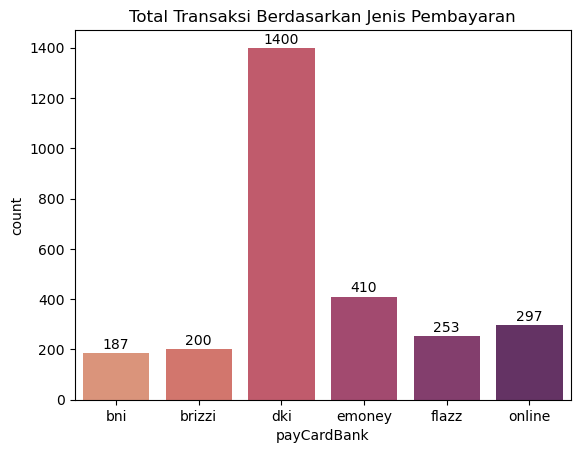

In [34]:
fig = sns.countplot(x='payCardBank', data=nol, palette= 'flare' )
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Total Transaksi Berdasarkan Jenis Pembayaran')

Insight: Terdapat 1400 orang yang memakai paycard DKI yang payamountnya 0 selain layanan mikrotrans dan bus wisata, hal ini dapat berkaitan dengan kebijakan layanan gratis pakai jakcard bank DKI. 

### Pertanyaan apakah koridor dengan layanan bis khusus wanita benar benar memiliki pennumpang wanita jauh lebih banyak dibandingkan laki laki?

In [35]:
Koridor_buswanita = ['13','2','9','3']
kor_2 = df[df['corridorID']=='2']
kor_3 = df[df['corridorID']=='3']
kor_9 = df[df['corridorID']=='9']
kor_13 = df[df['corridorID']=='13']

Text(0.5, 1.0, 'Koridor 13')

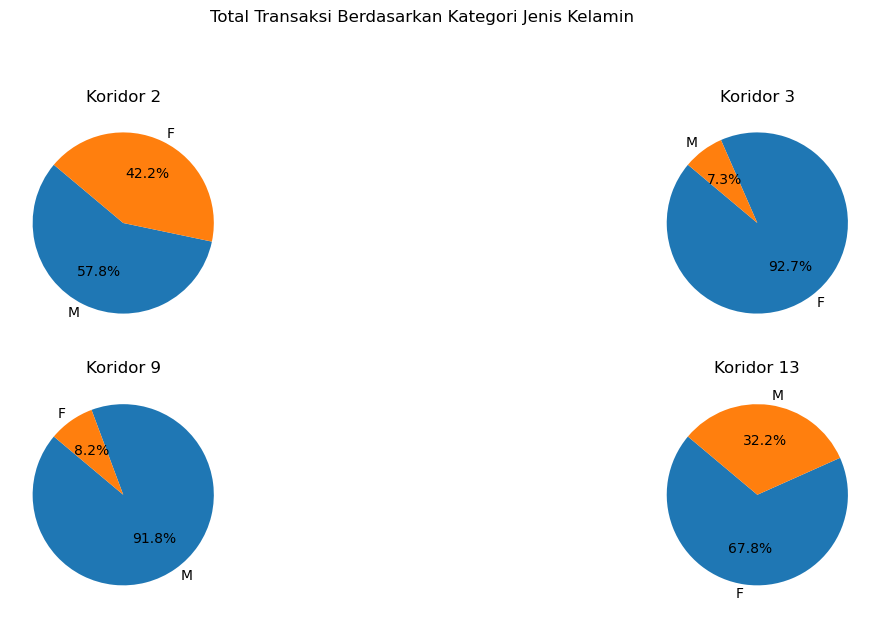

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.suptitle('Total Transaksi Berdasarkan Kategori Jenis Kelamin')

plt.subplot(3,2,1)
sex_counts_kor2 = kor_2['payCardSex'].value_counts()
plt.pie(sex_counts_kor2, labels=sex_counts_kor2.index, autopct='%1.1f%%', startangle=140)
plt.title('Koridor 2')

plt.subplot(3,2,2)
sex_counts_kor3 = kor_3['payCardSex'].value_counts()
plt.pie(sex_counts_kor3, labels=sex_counts_kor3.index, autopct='%1.1f%%', startangle=140)
plt.title('Koridor 3')

plt.subplot(3,2,3)
sex_counts_kor9 = kor_9['payCardSex'].value_counts()
plt.pie(sex_counts_kor9, labels=sex_counts_kor9.index, autopct='%1.1f%%', startangle=140)
plt.title('Koridor 9')

plt.subplot(3,2,4)
sex_counts_13 = kor_13['payCardSex'].value_counts()
plt.pie(sex_counts_13, labels=sex_counts_13.index, autopct='%1.1f%%', startangle=140)
plt.title('Koridor 13')

insight: Koridor 3,dan 13 benar benar memerlukan bus wanita karena jumlah wanita yang lebih banyak bila dibandingan dengan pria. Bus wanita di koridor 2 masih tetap masuk akal bila diadakan untuk mengurangi kepadatan pada bus biasa.
Sedangkan koridor 9 jumlah perempuan yang memakai koridor ini cukup sedikit sehingga adanya bus wanita dirasa kurang diperlukan

### Layanan angkutan

Permasalahan layanan angkut:
- Koridor mana yang ramai penumpang dalam layanan angkut, kenapa koridor tersebut ramai?
- Tempat naik dan turun mana dari semua koridor yang ramai, kenapa koridor tersebut ramai?
- Jam berapa penumpang layanan angkutan ramai?

Text(0.5, 1.0, 'Lokasi TapOut dengan penumpang terbanyak')

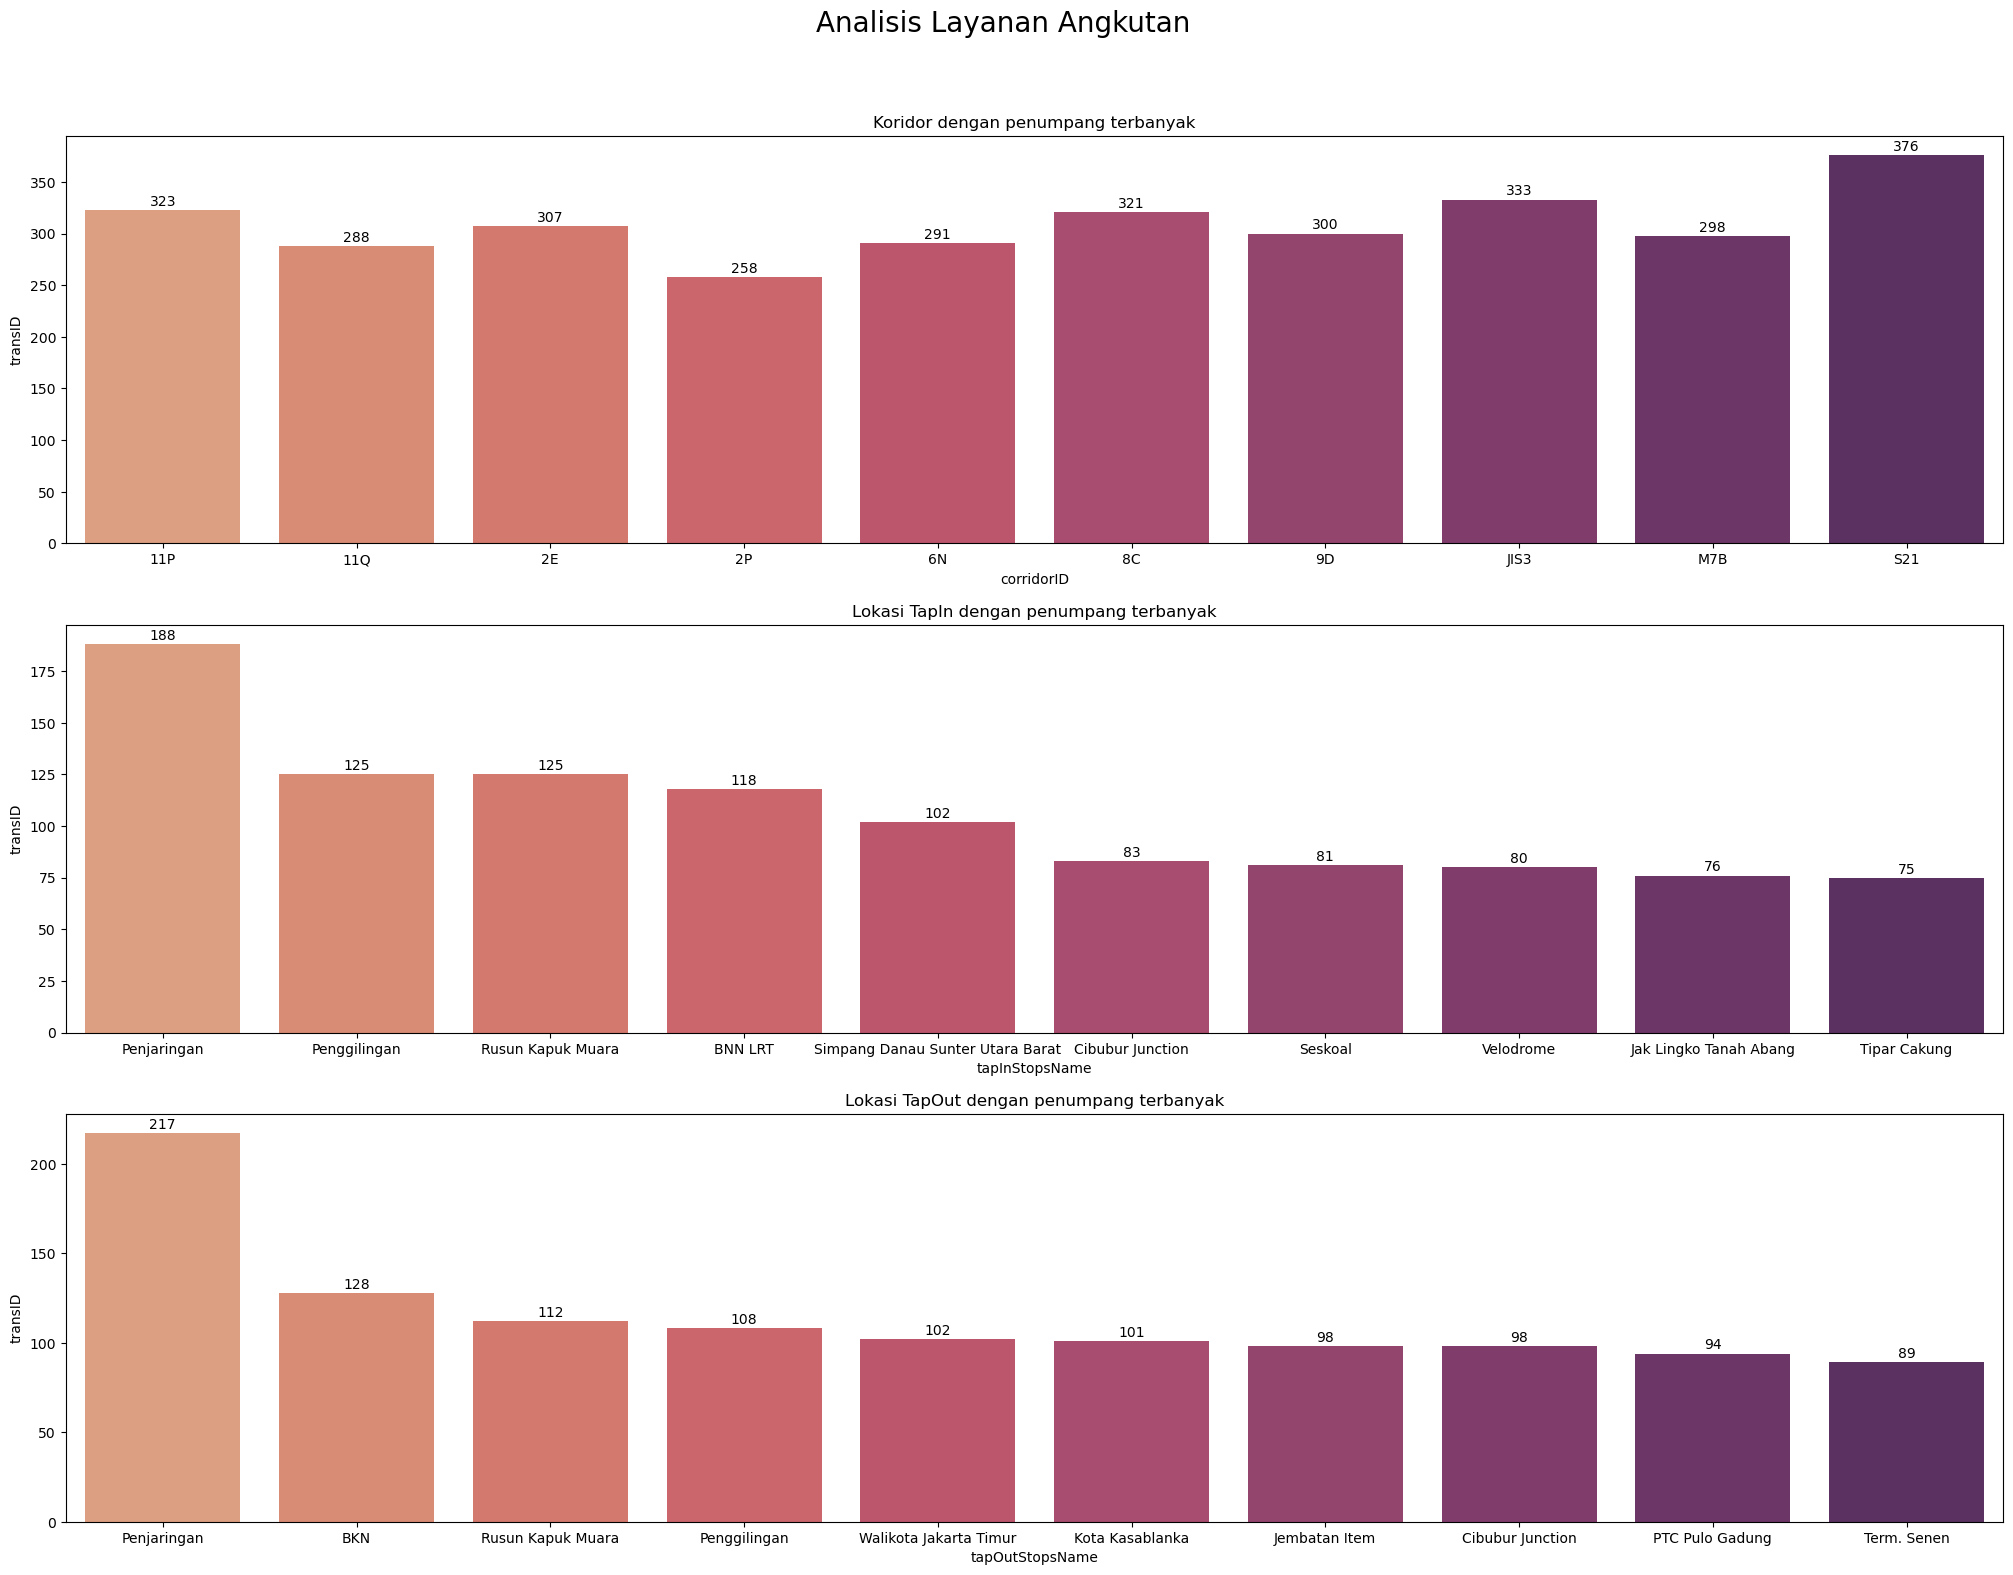

In [37]:
plt.figure(figsize= (25,18))
plt.suptitle('Analisis Layanan Angkutan', size=20, y=0.95)
cor_angkut = df_angkutan.groupby(by = 'corridorID' )[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
cor_angkut['corridorID'] =cor_angkut['corridorID'].cat.remove_unused_categories()
plt.subplot(3,1,1)
fig = sns.barplot(data = cor_angkut,x = 'corridorID',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Koridor dengan penumpang terbanyak')

tapin_angkut = df_angkutan.groupby(by = 'tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,2)
fig = sns.barplot(data = tapin_angkut,x = 'tapInStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapIn dengan penumpang terbanyak')

tapout_angkut = df_angkutan.groupby(by = 'tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,3)
fig = sns.barplot(data = tapout_angkut,x = 'tapOutStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapOut dengan penumpang terbanyak')

insight: Berdasarkan ketegori layanan angkut, koridor dengan penumpang terbanyak yaitu koridor [Koridor S21](https://megapolitan.kompas.com/read/2023/02/18/01450021/rute-transjabodetabek-s21-csw-ciputat.), hal ini dikarenakan melewati tempat strategis seperti Stasiun MRT Blok M, Taman Martha Tiahahu, Kramat Pela, Pondok Indah, Lebak Bulus, Situ Gintung, UIN, Pasar Ciputat, kejaksaan agung dan lainnya 

In [38]:
KOR_s21 = df[df['corridorID']=='S21']
KOR_s21['tapOutStopsName'].unique()

array(['Antena II', 'Pom Bensin Ciputat', 'Situ Gintung 2',
       'Kejaksaan Agung', 'Pondok Pinang', 'Auto 2000', 'Jln. H. Ahmad',
       'Jln. Pahlawan', 'Komplek Mandiri Giant Express 1',
       'Pool PPD Ciputat', 'LPP RRI 2', 'Ps. Ciputat', 'Dwijaya',
       'Margaguna 2', 'Polsek Ciputat 2', 'Jln. Sandratex 1',
       'Hotel Melawai', 'Kampus Uin 2', 'Pondok Indah 1',
       'Komplek Mandiri Giant Express 2', 'Taman Ayodya', 'RA Kartini',
       'Komplek Uin', 'ASEAN', 'LPP RRI 1', 'UMJ 2', 'Pondok Indah 2'],
      dtype=object)

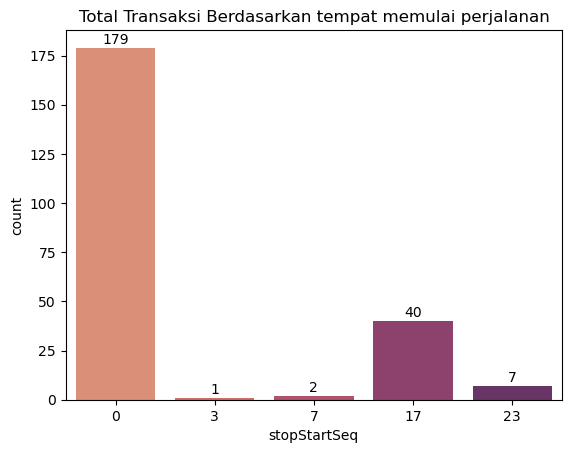

In [39]:
# pengecekan asumsi bahwa halte panjangan ramai karena sebagai tempat memulai dan mengakhiri perjalanannya
penjaringan =df[df['tapInStopsName']=='Penjaringan']
penjaringan_TO =df[df['tapOutStopsName']=='Penjaringan']
fig = sns.countplot(x='stopStartSeq', data=penjaringan, palette= 'flare' )
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Total Transaksi Berdasarkan tempat memulai perjalanan')
plt.show()

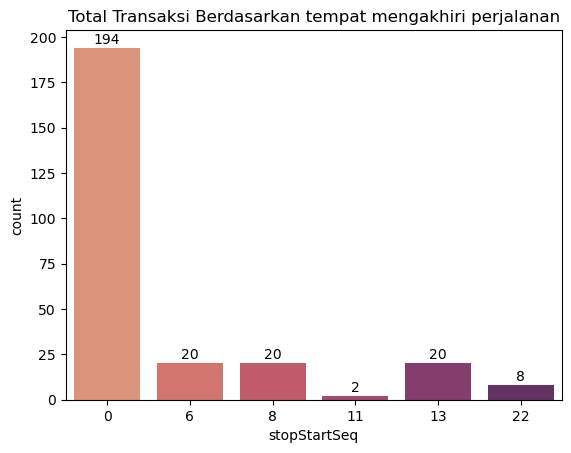

In [40]:
# pengecekan asumsi bahwa halte panjangan ramai karena sebagai tempat memulai dan mengakhiri perjalanannyaf
fig = sns.countplot(x='stopStartSeq', data=penjaringan_TO, palette= 'flare' )
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Total Transaksi Berdasarkan tempat mengakhiri perjalanan')
plt.show()

insight: Halte penjaringan ramai dapat disebakan karena titik pertama penumpang naik, menurut [wikipedia](https://id.wikipedia.org/wiki/Halte_Transjakarta_Penjaringan) seluruh layanan koridor 12 memulai dan mengakhiri perjalanannya di halte ini. Teori ini dapat dibuktikan dari grafik yang menunjuka halte penjaringan ramai pada stopstartseq(Urutan perhentian) = 0

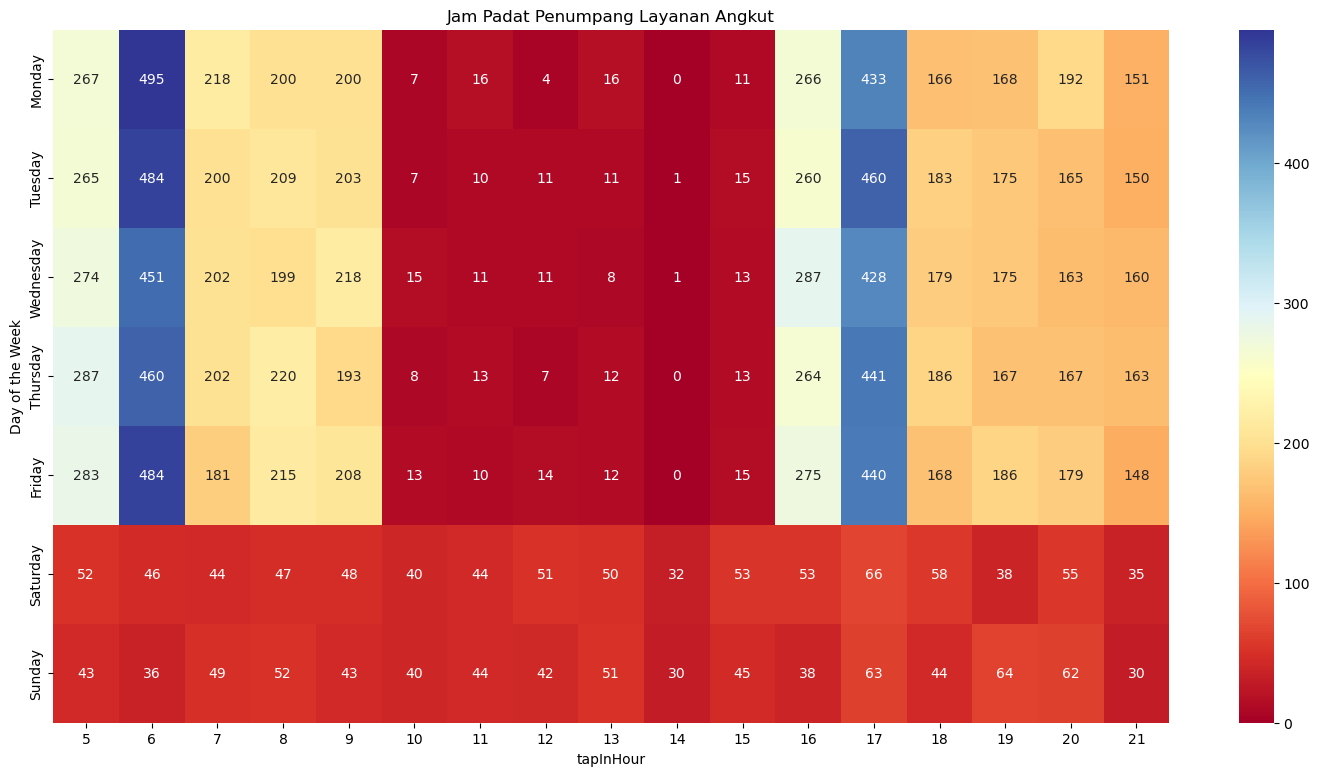

In [41]:
Hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_hour = pd.crosstab(df_angkutan['Day_Name'], df_angkutan['hour']).reindex(Hari)
rush_hour
plt.figure(figsize=(18, 9))
sns.heatmap(rush_hour, annot=True, annot_kws={'size':10}, fmt='d', cmap='RdYlBu', xticklabels=True)
plt.title('Jam Padat Penumpang Layanan Angkut')
plt.xlabel('tapInHour')
plt.ylabel('Day of the Week')
plt.show()

insight: Berdasarkan heatmap jam terpadat penumpang transjakarta layanan angkutan terjadi pada hari kerja yaitu pukul 6 pagi dan 5 sore pada hari kerja. Jam tersebut diasumsikan sebagai jam pergi dan pulang kantor.

### Layanan Royal Trans

Permasalahan layanan royaltrans:
- Koridor mana yang ramai penumpang dalam layanan royaltrans, kenapa koridor tersebut ramai?
- Tempat naik dan turun mana dari semua koridor yang ramai, kenapa koridor tersebut ramai?
- Jam berapa penumpang layanan royaltrans ramai?

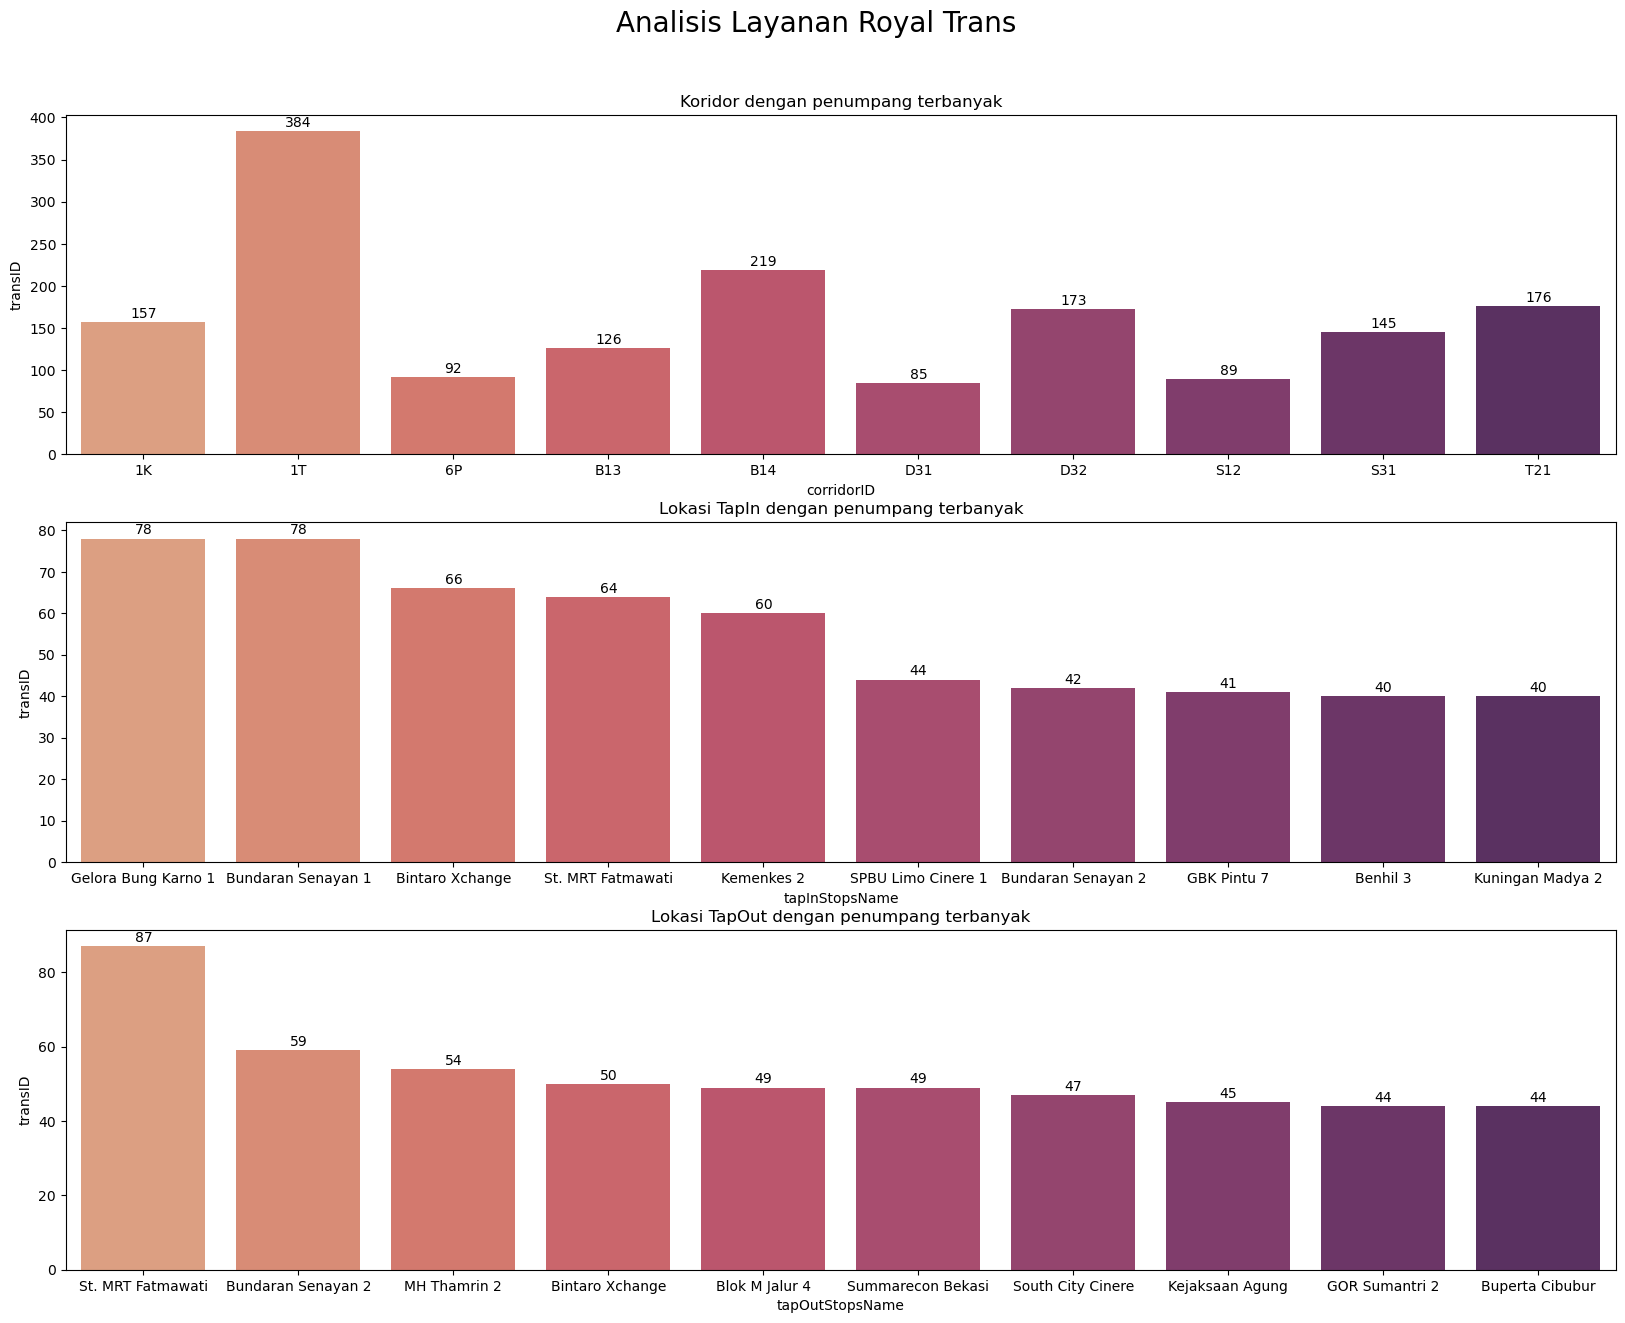

In [42]:
plt.figure(figsize= (20,15))
plt.suptitle('Analisis Layanan Royal Trans', size=20, y=0.95)
plt.subplot(3,1,1)
cor_royal = df_royal.groupby(by = 'corridorID')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
cor_royal['corridorID'] =cor_royal['corridorID'].cat.remove_unused_categories()
fig = sns.barplot(data = cor_royal,x = 'corridorID',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Koridor dengan penumpang terbanyak')

tapin_royal = df_royal.groupby(by = 'tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,2)
fig = sns.barplot(data = tapin_royal,x = 'tapInStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapIn dengan penumpang terbanyak')

tapout_royal = df_royal.groupby(by = 'tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,3)
fig = sns.barplot(data = tapout_royal,x = 'tapOutStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapOut dengan penumpang terbanyak')
plt.show()

In [43]:
KOR_1T = df[df['corridorID']=='1T']
KOR_1T

transID            payCardID payCardBank  \
5      DDES630K2F80KC     2251412124634980         dki   
134    ESJQ990H8Q22LV      345711968178505      emoney   
305    ELVF454E9T40AX     2251412124634980         dki   
370    BXVS080I7X46TX     3549158005951908         dki   
434    DXGL440B0R80HB      345711968178505      emoney   
...               ...                  ...         ...   
33697  TPAD275S9L47PO     4501839580844956         dki   
33908  UCFC924P2I45WZ     4800273826652460         dki   
34354  MYJJ824L9L59SU     5539337945664584         dki   
34440  IVEJ322X2Z13YE  4315872976588851570      brizzi   
37897  YXPP627N4G95HO      213159426675861      emoney   

                     payCardName payCardSex  payCardBirthDate corridorID  \
5                  Tirta Siregar          F              1993         1T   
134             Kawaya Oktaviani          M              2009         1T   
305                Tirta Siregar          F              1993         1T   
370    Mustofa Wijayanti, M.Farm          M              1981         1T   
434             Kawaya Oktaviani          M              2009         1T   
...                          ...        ...               ...        ...   
33697            Cindy Salahudin          M              1978         1T   
33908            Rahayu Winarsih          F              1988         1T   
34354         Vega Suryono, M.Ak          F              2008         1T   
34440           Rahmi Novitasari          F              1981         1T   
37897     drg. Zahra Nashiruddin          F              1976         1T   

               corridorName  direction tapInStops    tapInStopsName  \
5      Cibubur - Balai Kota        0.0    B00127P          Benhil 3   
134    Cibubur - Balai Kota        1.0    B00102P      Balai Kota 1   
305    Cibubur - Balai Kota        1.0    B00325P      Dukuh Atas 3   
370    Cibubur - Balai Kota        1.0    B05773P          Tosari 1   
434    Cibubur - Balai Kota        0.0    B00248P  Cibubur Junction   
...                     ...        ...        ...               ...   
33697  Cibubur - Balai Kota        0.0    B00694P       Grand Sahid   
33908  Cibubur - Balai Kota        1.0    B02873P     Plaza Sentral   
34354  Cibubur - Balai Kota        0.0    B02863P   Plaza Indonesia   
34440  Cibubur - Balai Kota        0.0    B03314P      MH Thamrin 2   
37897  Cibubur - Balai Kota        1.0    B02873P     Plaza Sentral   

       tapInStopsLat  tapInStopsLon  stopStartSeq           tapInTime  \
5          -6.216010      106.81632             3 2023-04-03 05:08:01   
134        -6.180598      106.82847             0 2023-04-03 05:28:11   
305        -6.205650      106.82250             7 2023-04-03 16:15:42   
370        -6.199166      106.82334             6 2023-04-03 17:54:25   
434        -6.368735      106.89366             0 2023-04-03 17:49:34   
...              ...            ...           ...                 ...   
33697      -6.210975      106.82059             6 2023-04-22 05:20:41   
33908      -6.216247      106.81676            12 2023-04-23 06:27:43   
34354      -6.193733      106.82280            11 2023-04-30 11:50:29   
34440      -6.188238      106.82277            12 2023-04-29 05:57:17   
37897      -6.216247      106.81676            12 2023-04-04 10:29:47   

      tapOutStops   tapOutStopsName  tapOutStopsLat  tapOutStopsLon  \
5         B00694P       Grand Sahid       -6.210975       106.82059   
134       B00360P   Flyover Karet 2       -6.214808       106.81847   
305       B02873P     Plaza Sentral       -6.216247       106.81676   
370       B00325P      Dukuh Atas 3       -6.205650       106.82250   
434       B03314P      MH Thamrin 2       -6.188238       106.82277   
...           ...               ...             ...             ...   
33697     B02420P    Menara Thamrin       -6.185275       106.82291   
33908     B00226P   Buperta Cibubur       -6.370321       106.89628   
34354     B00113P  Bank Indonesia 2

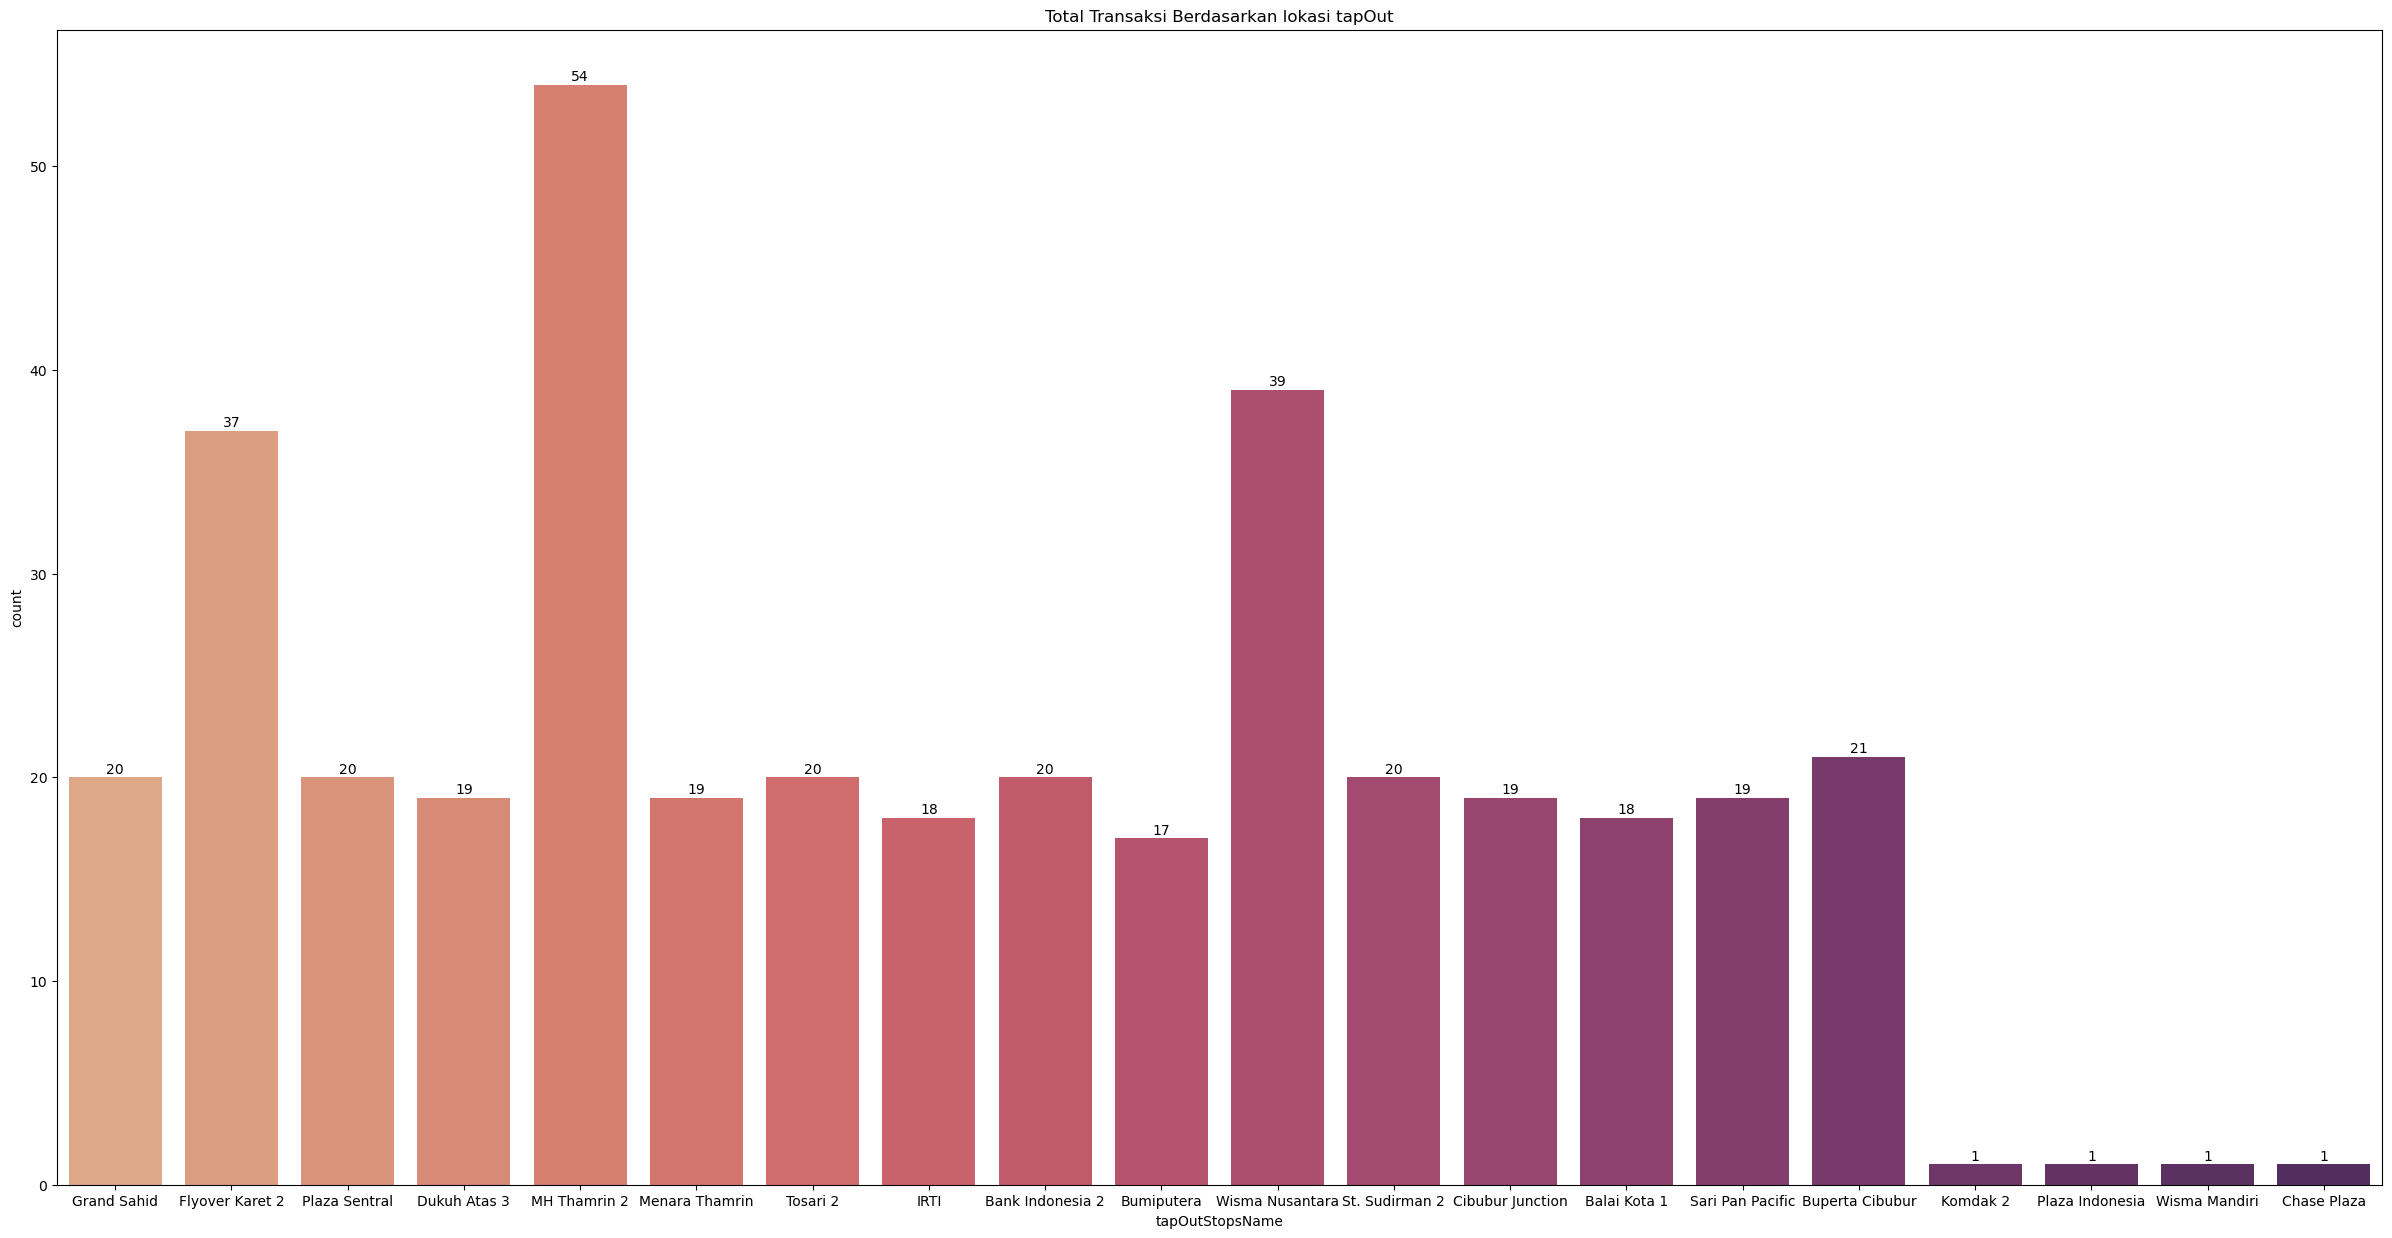

In [44]:
# pengecekan asumsi bahwa kooridor 1 T ramai karena integrasi dengan transportasi umum lainnya
plt.figure(figsize= (30,15))
fig = sns.countplot(x= 'tapOutStopsName', data= KOR_1T, palette= 'flare', )
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Total Transaksi Berdasarkan lokasi tapOut')
plt.show()

Insight: 
- [Koordor_1T](https://id.wikipedia.org/wiki/Koridor_1_Transjakarta) ramai dapat disebabkan karena terintegrasi dengan layanan kereta api antarkota, Commuter Line beserta MRT Jakarta dan LRT Jabodebek di halte Dukuh Atas. Pendapat tersebut tidak sepenuhnya salah namun lebih banyak orang yang turun di lokasi MH thamrin
- Lokasi TapiIn terbanyak di Gelora Bung Karno 1 dan lokasi TapOut terbanyak di St MRT fatmawati. Lokasi tapout terbanyak karena terinstegrasi layanan MRT,sehingga mempermudah penumpang yang ingin melanjutkan perjalanan dengan Transjakarta

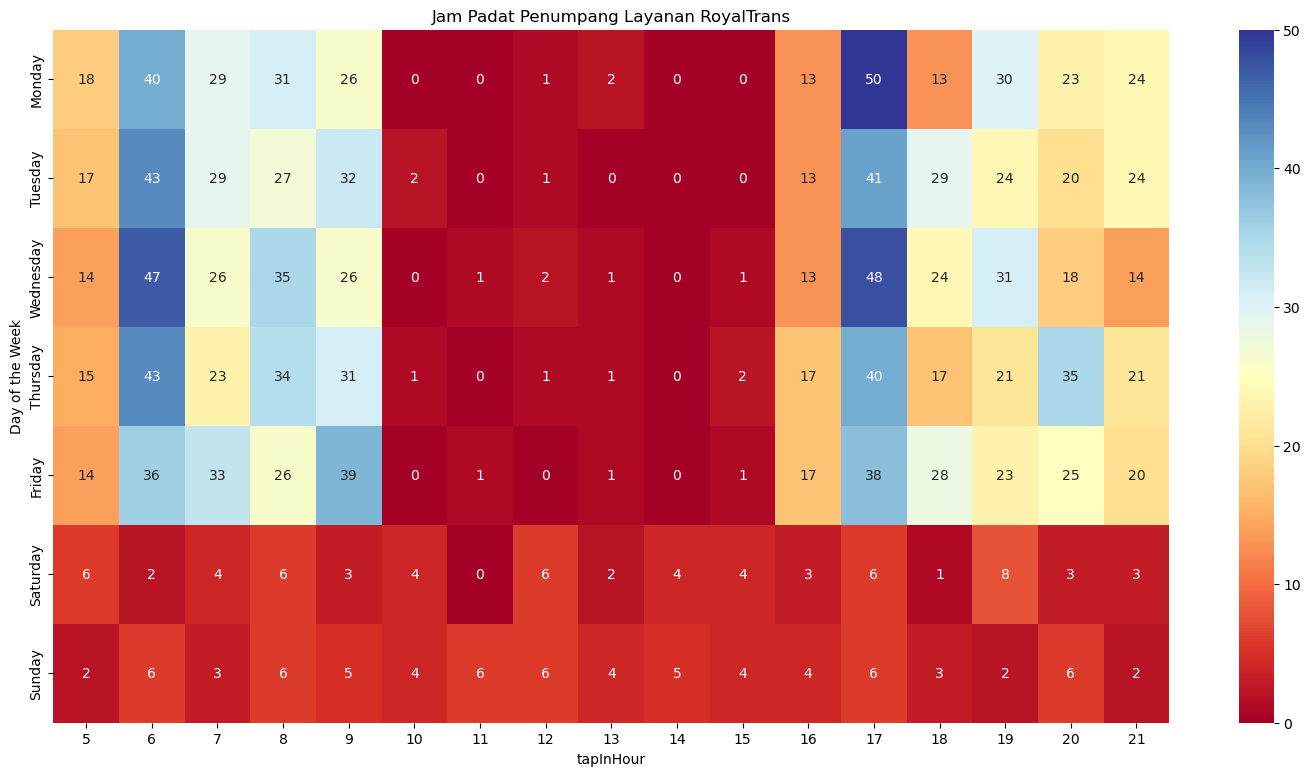

In [45]:
Hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_hour = pd.crosstab(df_royal['Day_Name'], df_royal['hour']).reindex(Hari)
rush_hour
plt.figure(figsize=(18, 9))
sns.heatmap(rush_hour, annot=True, annot_kws={'size':10}, fmt='d', cmap='RdYlBu', xticklabels=True)
plt.title('Jam Padat Penumpang Layanan RoyalTrans')
plt.xlabel('tapInHour')
plt.ylabel('Day of the Week')
plt.show()

Insight: Jumlah penumpang royaltrans tidak terlalu ramai seperti layanan angkut. Hal ini berkaitan dengan aturan royaltrans, bahwa satu bus maksimal diisi 30 penumpang duduk dan 13 [penumpang](https://www.kompas.tv/regional/437315/transjakarta-batal-naikkan-tarif-bus-royaltrans-dari-rp20-000-jadi-rp40-000?page=all#:~:text=Mengutip%20dari%20laman%20resmi%20TransJakarta,dan%20penumpang%20berdiri%20sekitar%2013.) berdiri. Dari heatmap dapat disimpulkan, jumlah penumpang tidak melebihi kapasitas sehingga belum memerlukan tambahan armada baru. 

### Layanan Mikrotrans

Permasalahan layanan mikrotrans:
- Koridor mana yang ramai penumpang dalam layanan mikrotrans
- Tempat naik dan turun mana dari semua koridor yang ramai
- Jam berapa penumpang layanan angkutan ramai?
- Mengapa mikrotrans ramai penumpang?

Text(0.5, 1.0, 'Lokasi TapOut dengan penumpang terbanyak')

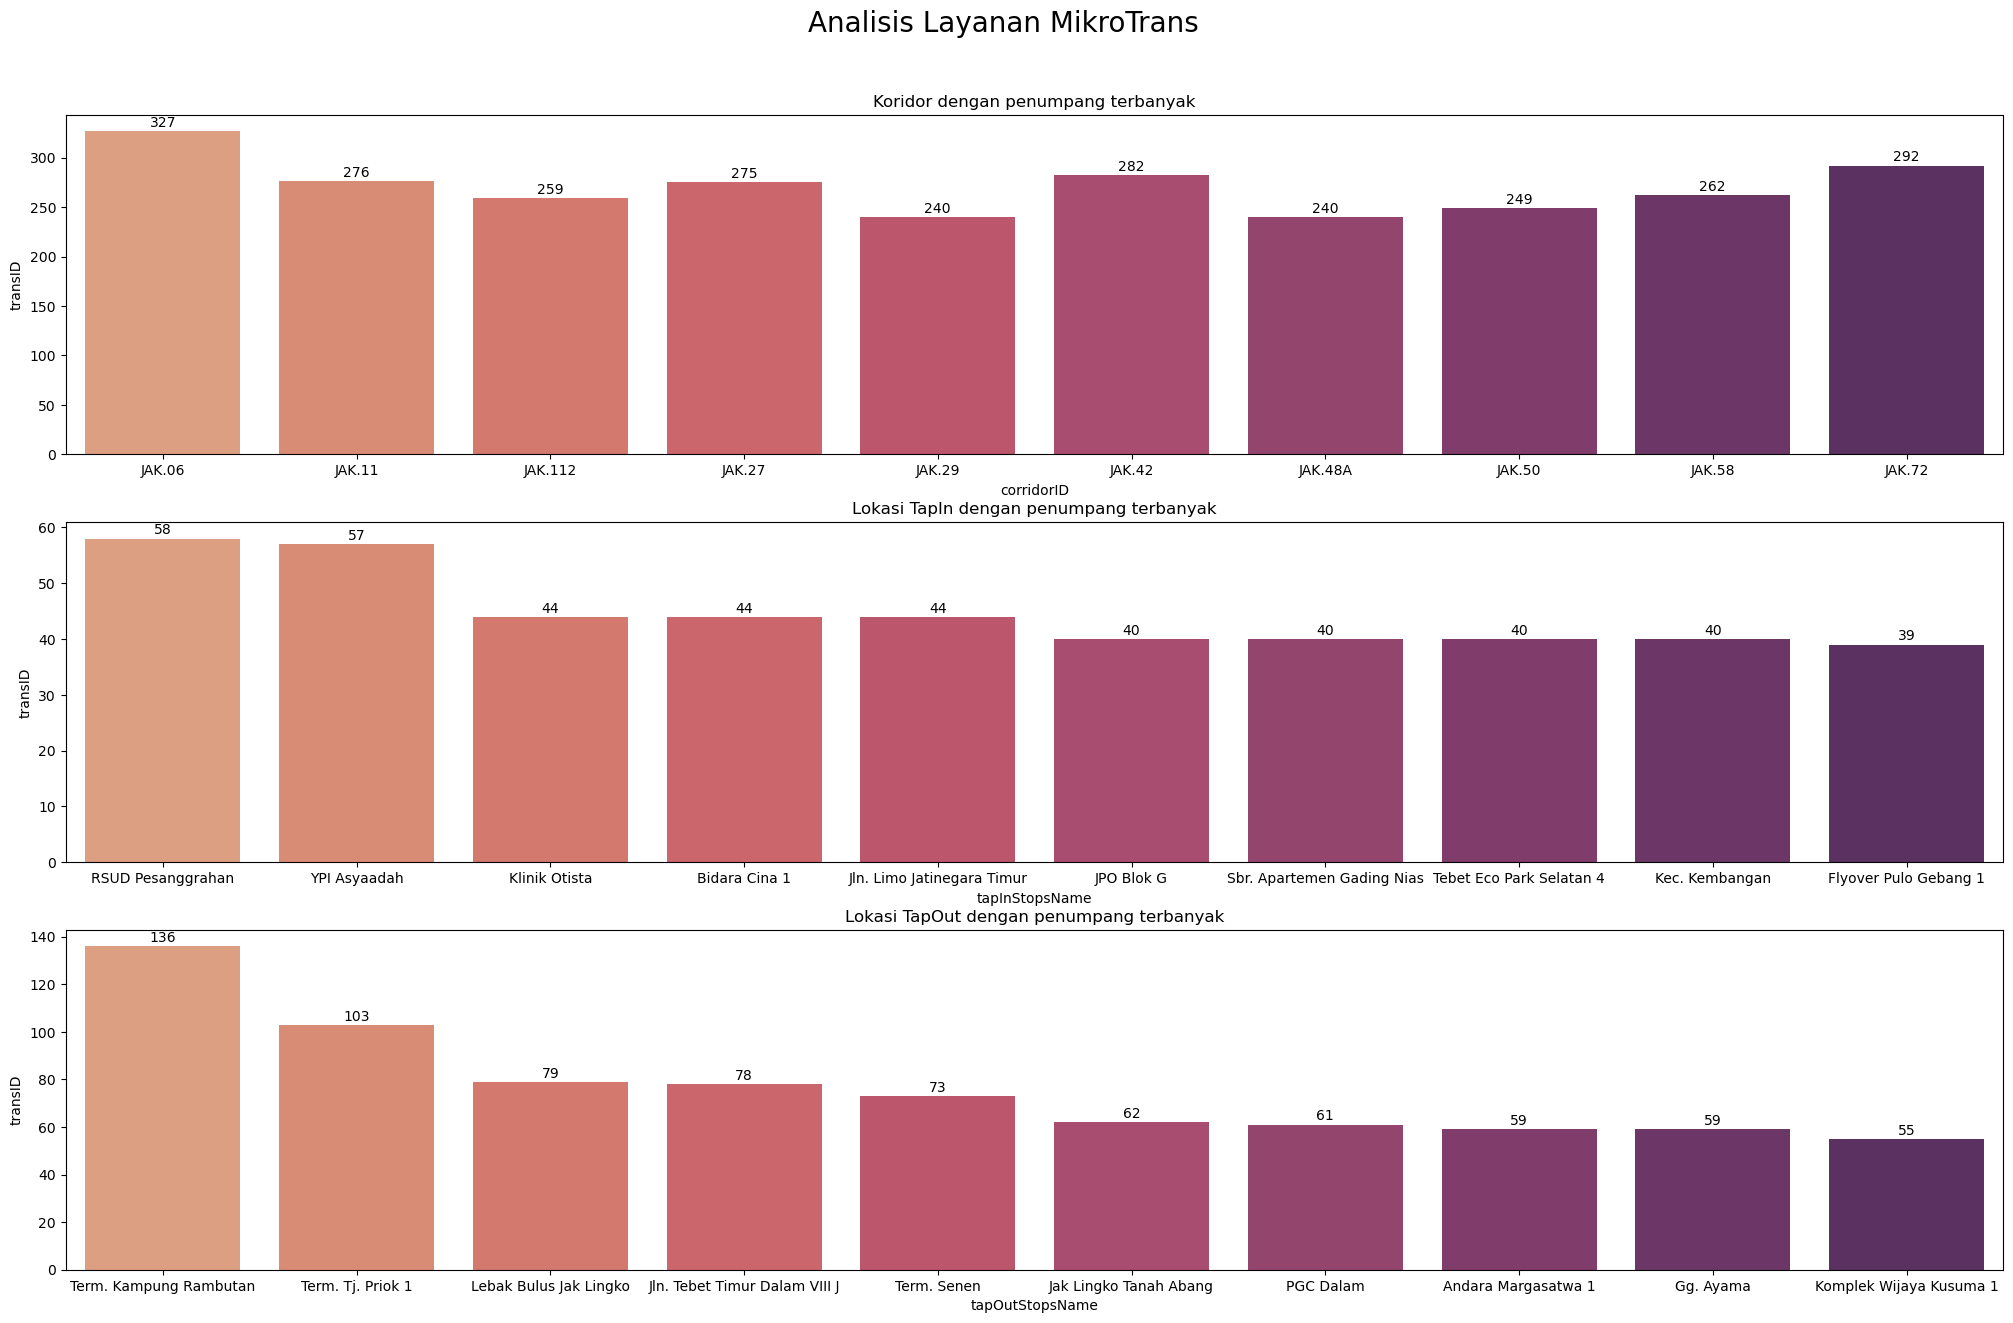

In [46]:
plt.figure(figsize= (25,15))
plt.suptitle('Analisis Layanan MikroTrans', size=20, y=0.95)
plt.subplot(3,1,1)
cor_mikro = df_Mikrotrans.groupby(by = 'corridorID')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
cor_mikro['corridorID'] =cor_mikro['corridorID'].cat.remove_unused_categories()
fig = sns.barplot(data = cor_mikro,x = 'corridorID',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Koridor dengan penumpang terbanyak')

tapin_mikro = df_Mikrotrans.groupby(by = 'tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,2)
fig = sns.barplot(data = tapin_mikro,x = 'tapInStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapIn dengan penumpang terbanyak')

tapout_mikro = df_Mikrotrans.groupby(by = 'tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,3)
fig = sns.barplot(data = tapout_mikro,x = 'tapOutStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapOut dengan penumpang terbanyak')

In [47]:
# Pengecekan aasumsi mikrotrans ramai dikarenakan melewati banyak pemberhentian
df.groupby(by = 'corridorID')[['Halte']].max().sort_values(by = 'Halte', ascending=False)

Halte
corridorID       
JAK.58       64.0
JAK.14       60.0
JAK.110A     54.0
JAK.53       51.0
JAK.19       50.0
...           ...
9N            2.0
7C            2.0
11K           2.0
3C            1.0
12H           1.0

[221 rows x 1 columns]

Insight: Hampir semua kooridor mikrotrans ramai, hai ini dapat disebabkan karena mikrotrans menjangkau banyak [pemberhentian](https://journal.unimar-amni.ac.id/index.php/Wawasan/article/download/2232/1846/6633), berdasarkan jumlah halte yang dilewati mikrotrans memiliki jumlah pemberhentian yang yang jauh lebih banyak dibanding dengan layanan lain

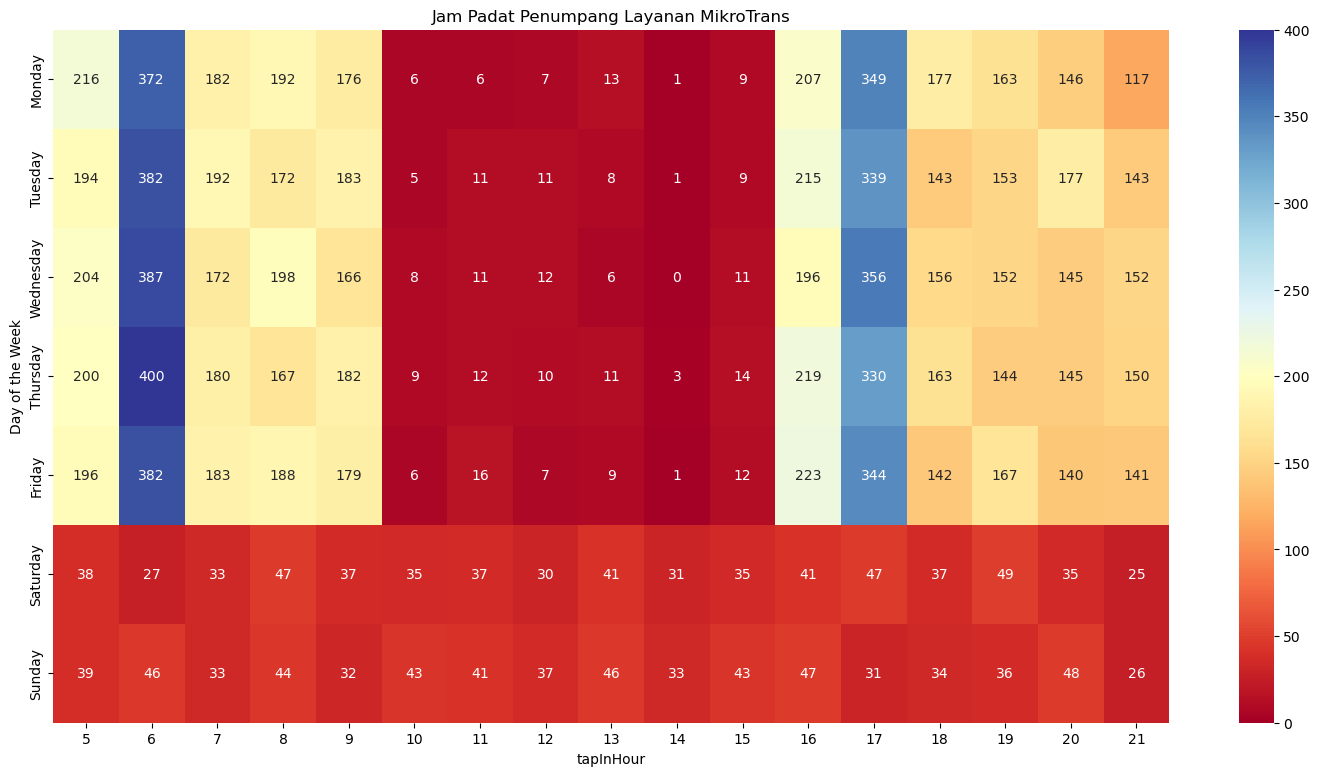

In [48]:
Hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_hour = pd.crosstab(df_Mikrotrans['Day_Name'], df_Mikrotrans['hour']).reindex(Hari)
rush_hour
plt.figure(figsize=(18, 9))
sns.heatmap(rush_hour, annot=True, annot_kws={'size':10}, fmt='d', cmap='RdYlBu', xticklabels=True)
plt.title('Jam Padat Penumpang Layanan MikroTrans')
plt.xlabel('tapInHour')
plt.ylabel('Day of the Week')
plt.show()

insight: 

Layanan mikrotrans ramai pada jam 5-9 pagi dan 4-9 malam. 

Keunggulan Rute Mikrotrans:
- Aksesibilitas: Menghubungkan area pemukiman dengan pusat komersial dan
perkantoran, memudahkan mobilitas warga.
- Fleksibilitas: Melalui banyak titik penting seperti Stasiun Klender yang dapat
menjadi tujuan atau tempat berangkat penumpang.
- Efisiensi: Menggunakan jalan-jalan utama yang umumnya lebih lancar dan
memiliki banyak fasilitas di sekitarnya

Sehingga jam ramai penumpang dapat disimpulkan karena melewati pusat komersil dan perkantoran pada jam masuk dan pulang kerja

### Layanan Wisata

Permasalahan layanan wisata:
- Koridor mana yang ramai penumpang dalam layanan wisata, kenapa koridor tersebut ramai?
- Tempat naik dan turun mana dari semua koridor yang ramai, kenapa koridor tersebut ramai?
- Apakah layanan wisata ramai dihari libur, dan ramai oleh anak anak?
- Jam berapa penumpang layanan wisata ramai?


Text(0.5, 1.0, 'Lokasi TapOut dengan penumpang terbanyak')

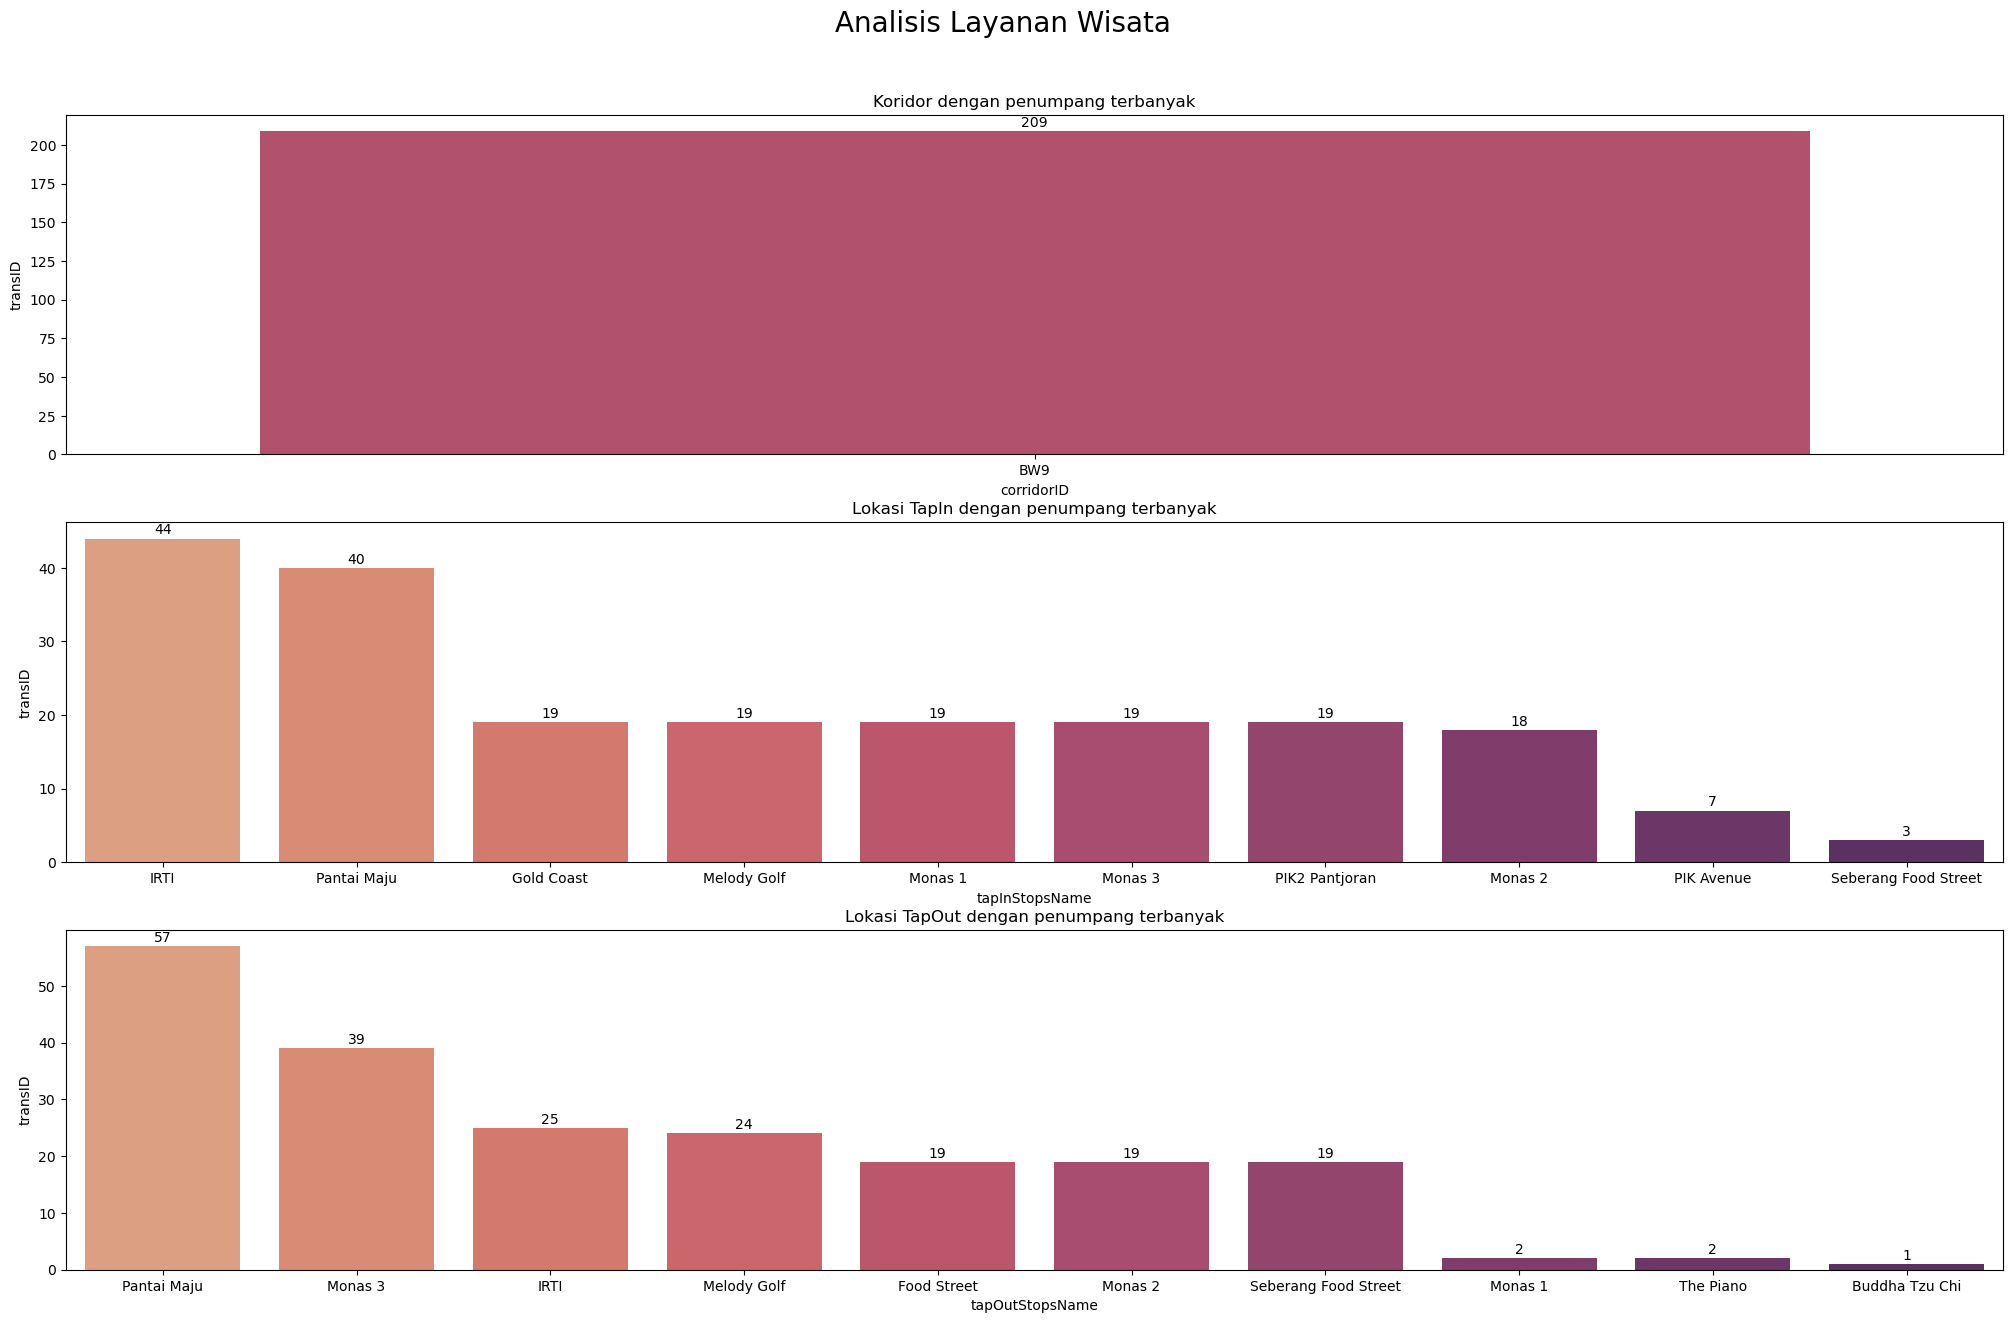

In [49]:
plt.figure(figsize= (25,15))
plt.suptitle('Analisis Layanan Wisata', size=20, y=0.95)
plt.subplot(3,1,1)
cor_wisata = df_Wisata.groupby(by = 'corridorID')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(1)
cor_wisata['corridorID'] = cor_wisata['corridorID'].cat.remove_unused_categories()
fig = sns.barplot(data = cor_wisata,x = 'corridorID',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Koridor dengan penumpang terbanyak')

tapin_wisata = df_Wisata.groupby(by = 'tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,2)
fig = sns.barplot(data = tapin_wisata,x = 'tapInStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapIn dengan penumpang terbanyak')

tapout_wisata = df_Wisata.groupby(by = 'tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,3)
fig = sns.barplot(data = tapout_wisata,x = 'tapOutStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapOut dengan penumpang terbanyak')

Insight: Koridor BW9 merupakan satu satunya kooridor bus wisata yang ada pada data, sehingga tidak dapat dibandingkan dengan koridor lain. Lokasi tapIn dan tapOut terbanyak pada [IRTI](https://news.detik.com/berita/d-6528600/akhir-pekan-warga-antre-panjang-naik-bus-wisata-transj-di-irti-monas) Monas dan tapin terbanyak pada pantai maju yang merupakan destinasi wisata.

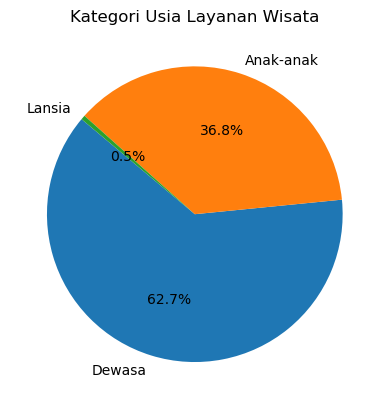

In [50]:
# pembuktian apakah layanan wisata ramai oleh anak anak?
age_counts_wisata = df_Wisata['Age_Type'].value_counts()
plt.pie(age_counts_wisata, labels=age_counts_wisata.index, autopct='%1.1f%%', startangle=140)
plt.title('Kategori Usia Layanan Wisata')
plt.show()

Insight: Layanan bus wisata tetap dinominasi orang dewasa tetapi persentase anak-anak cukup besar pada layanan ini.

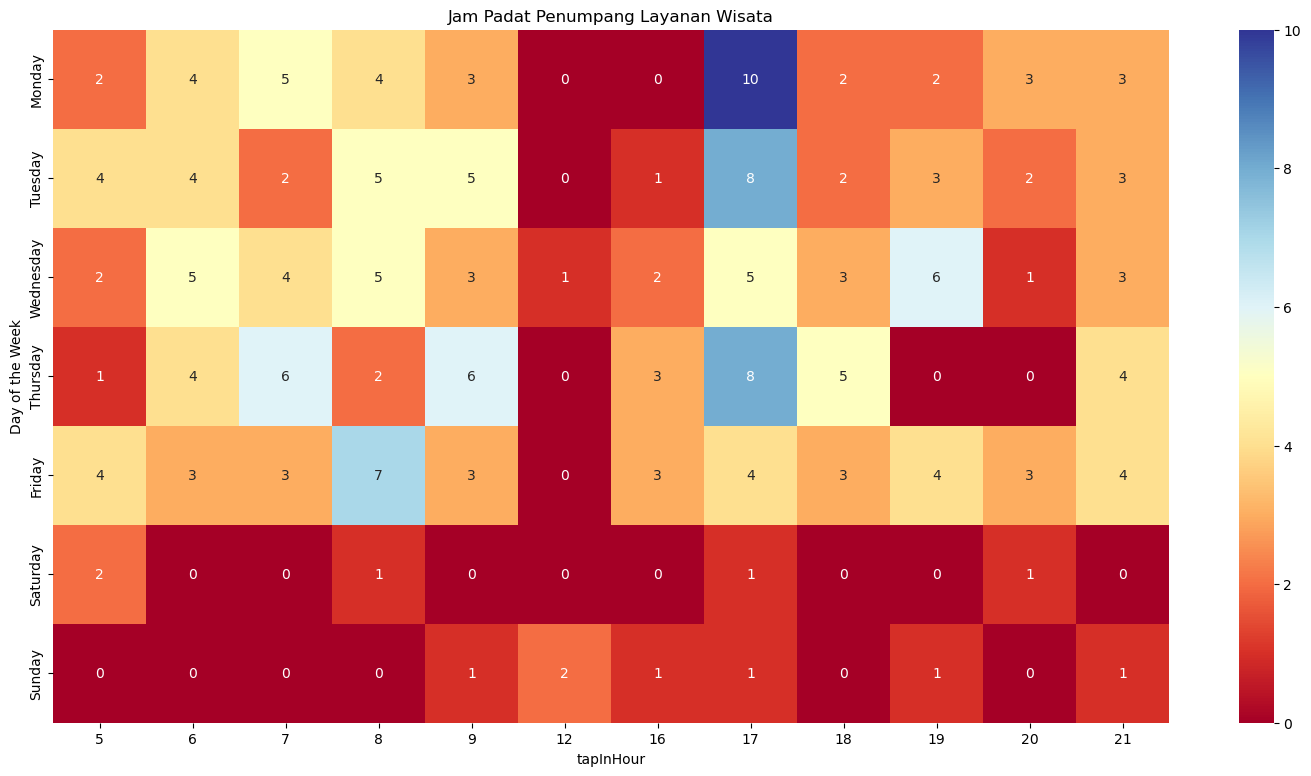

In [51]:
# pembuktian layanan wisata ramai dihari libur
Hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_hour = pd.crosstab(df_Wisata['Day_Name'], df_Wisata['hour']).reindex(Hari)
rush_hour
plt.figure(figsize=(18, 9))
sns.heatmap(rush_hour, annot=True, annot_kws={'size':10}, fmt='d', cmap='RdYlBu', xticklabels=True)
plt.title('Jam Padat Penumpang Layanan Wisata')
plt.xlabel('tapInHour')
plt.ylabel('Day of the Week')
plt.show()

insight: Bus wisata yang ada pada data hanya BW9, bus wisata cenderung sepi penumpang. Walaupun bus wisata, bus ini tidak ramai penumpang pada hari sabtu dan minggu.

### Layanan BRT

Permasalahan Layanan BRT:
- Koridor mana yang ramai penumpang dalam layanan BRT, kenapa koridor tersebut ramai?
- Tempat naik dan turun mana dari semua koridor yang ramai, kenapa koridor tersebut ramai?

Text(0.5, 1.0, 'Lokasi TapOut dengan penumpang terbanyak')

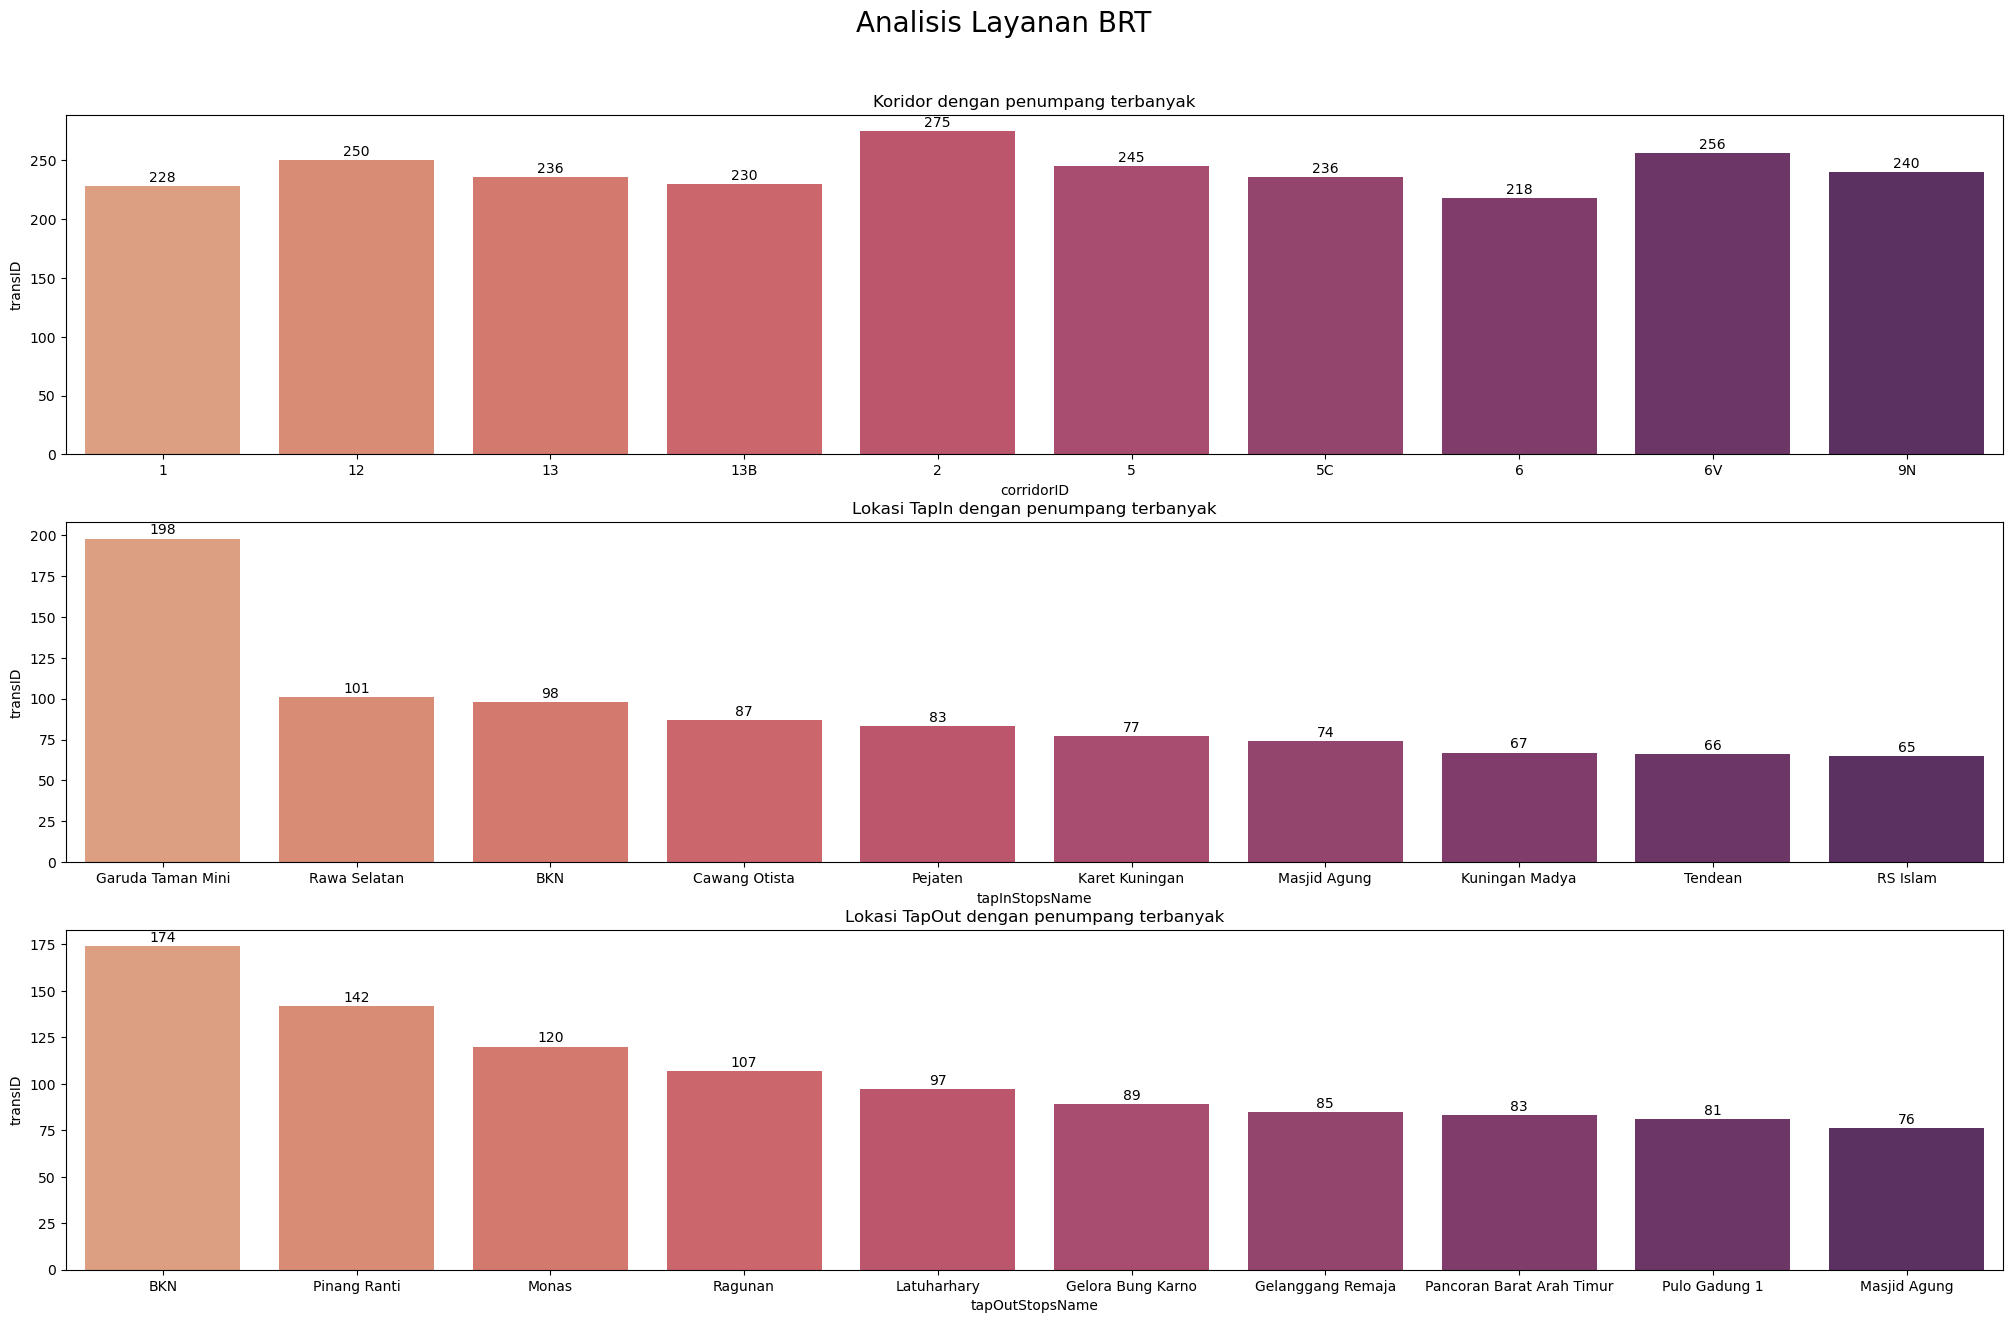

In [52]:
plt.figure(figsize= (25,15))
plt.suptitle('Analisis Layanan BRT', size=20, y=0.95)
plt.subplot(3,1,1)
cor_BRT = df_BRT.groupby(by = 'corridorID')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
cor_BRT['corridorID'] = cor_BRT['corridorID'].cat.remove_unused_categories()
fig = sns.barplot(data = cor_BRT,x = 'corridorID',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Koridor dengan penumpang terbanyak')

tapin_BRT = df_BRT.groupby(by = 'tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,2)
fig = sns.barplot(data = tapin_BRT,x = 'tapInStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapIn dengan penumpang terbanyak')

tapout_BRT = df_BRT.groupby(by = 'tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(10)
plt.subplot(3,1,3)
fig = sns.barplot(data = tapout_BRT,x = 'tapOutStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapOut dengan penumpang terbanyak')

Text(0.5, 1.0, 'Lokasi TapOut dengan penumpang terbanyak')

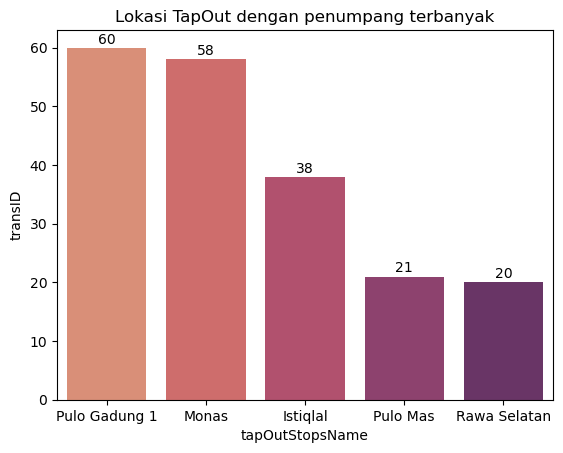

In [53]:
# Pembuktian koridor tersebut ramai karena banyak penumpang yang turun di monas dan istiqlal
kor_2 = df[df['corridorID']=='2']
tapout_kor2= kor_2.groupby(by = 'tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending= False).reset_index().head(5)


fig = sns.barplot(data = tapout_kor2,x = 'tapOutStopsName',y='transID', palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Lokasi TapOut dengan penumpang terbanyak')


insight: kooridor teramai dalam layanan BRT adalah [koridor_2](https://www.idntimes.com/travel/destination/fina-wahibatun-nisa-1/rute-transjakarta-koridor-2-pulo-gadung-monumen-nasional). Dari grafik dapat diambil kesimpulan banyak penumpang yang berhenti di monas dan istiqlal.

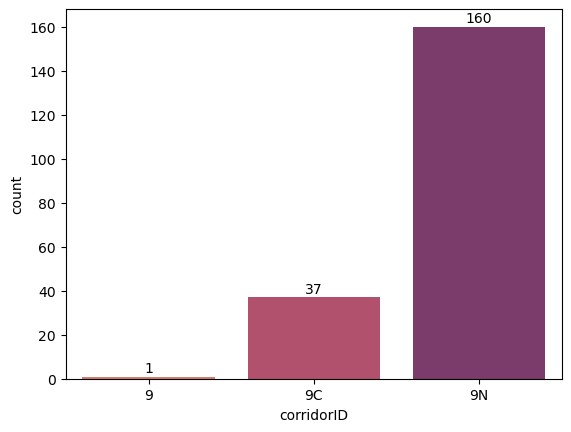

In [54]:
# pembuktian asumsi halte Garuda Taman Mini terhubung dengan Stasiun LRT Jabodebek Taman Mini untuk Koridor_9
TapIn = df[df['tapInStopsName']=='Garuda Taman Mini']
TapIn['corridorID'] =TapIn['corridorID'].cat.remove_unused_categories()
fig = sns.countplot(x='corridorID', data = TapIn, palette= 'flare')
for container in fig.containers:
    fig.bar_label(container, padding = 1)




Insight : Halte Garuda Taman Mini terhubung dengan Stasiun LRT Jabodebek Taman Mini untuk [Koridor_9](https://news.detik.com/berita/d-6900505/transjakarta-operasikan-dua-rute-mikrotrans-terintegrasi-ke-lrt-jabodebek.) (Pinang Ranti-Pluit), rute 9C (Pinang Ranti-Polda), rute 9N (Pinang Ranti-Cawang Soetoyo). Untuk  lokasi tapin jalur ini banyak penumpang naik untuk ke koridor 9N jadi tidak dapat disimpulkan bahwa tapin tersebut ramai karena terhubung jalur lrt pada koridor 9


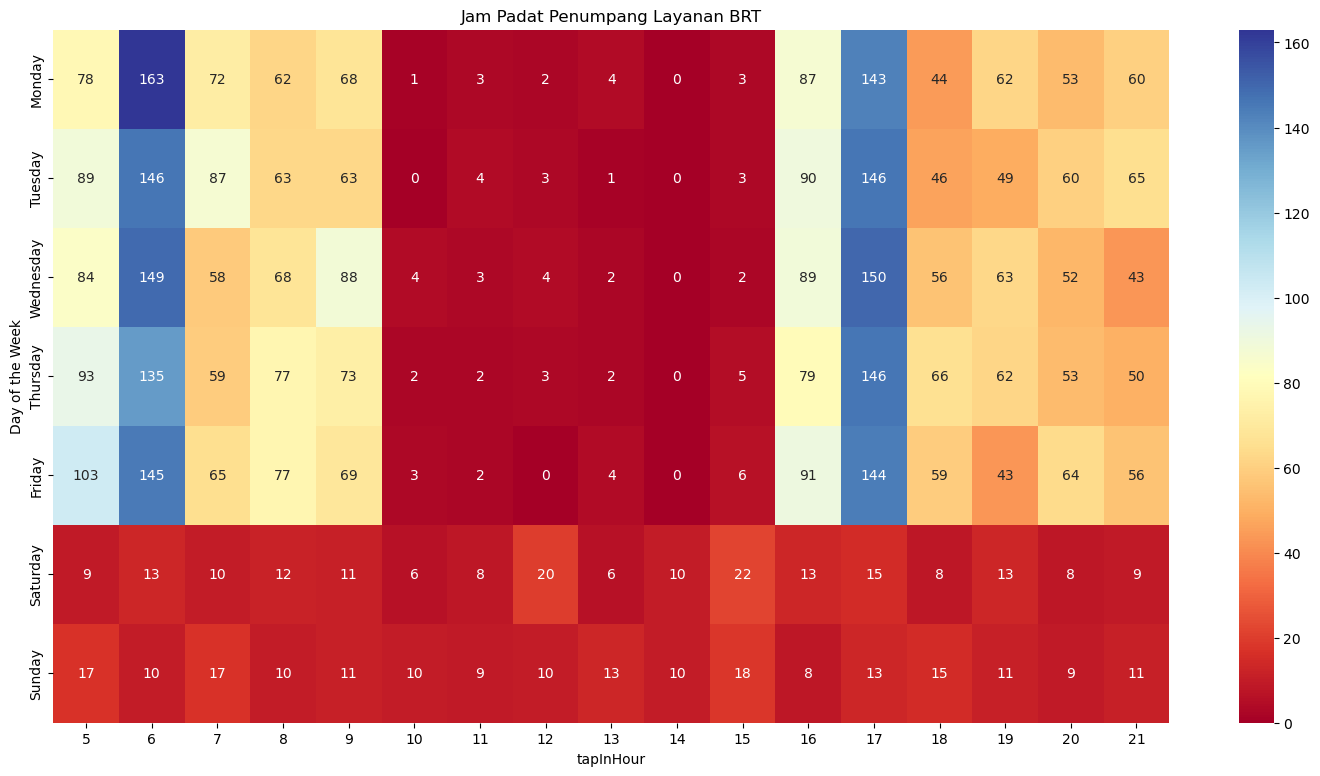

In [55]:
Hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_hour = pd.crosstab(df_BRT['Day_Name'], df_BRT['hour']).reindex(Hari)
rush_hour
plt.figure(figsize=(18, 9))
sns.heatmap(rush_hour, annot=True, annot_kws={'size':10}, fmt='d', cmap='RdYlBu', xticklabels=True)
plt.title('Jam Padat Penumpang Layanan BRT')
plt.xlabel('tapInHour')
plt.ylabel('Day of the Week')
plt.show()

insight: layanan BRT ramai pada jam 6 pagi dan 5 sore di hari kerja.

## Mencari outlier waktu perjalanan 

Text(0.5, 1.0, 'Distribution Traveltime Angkutan')

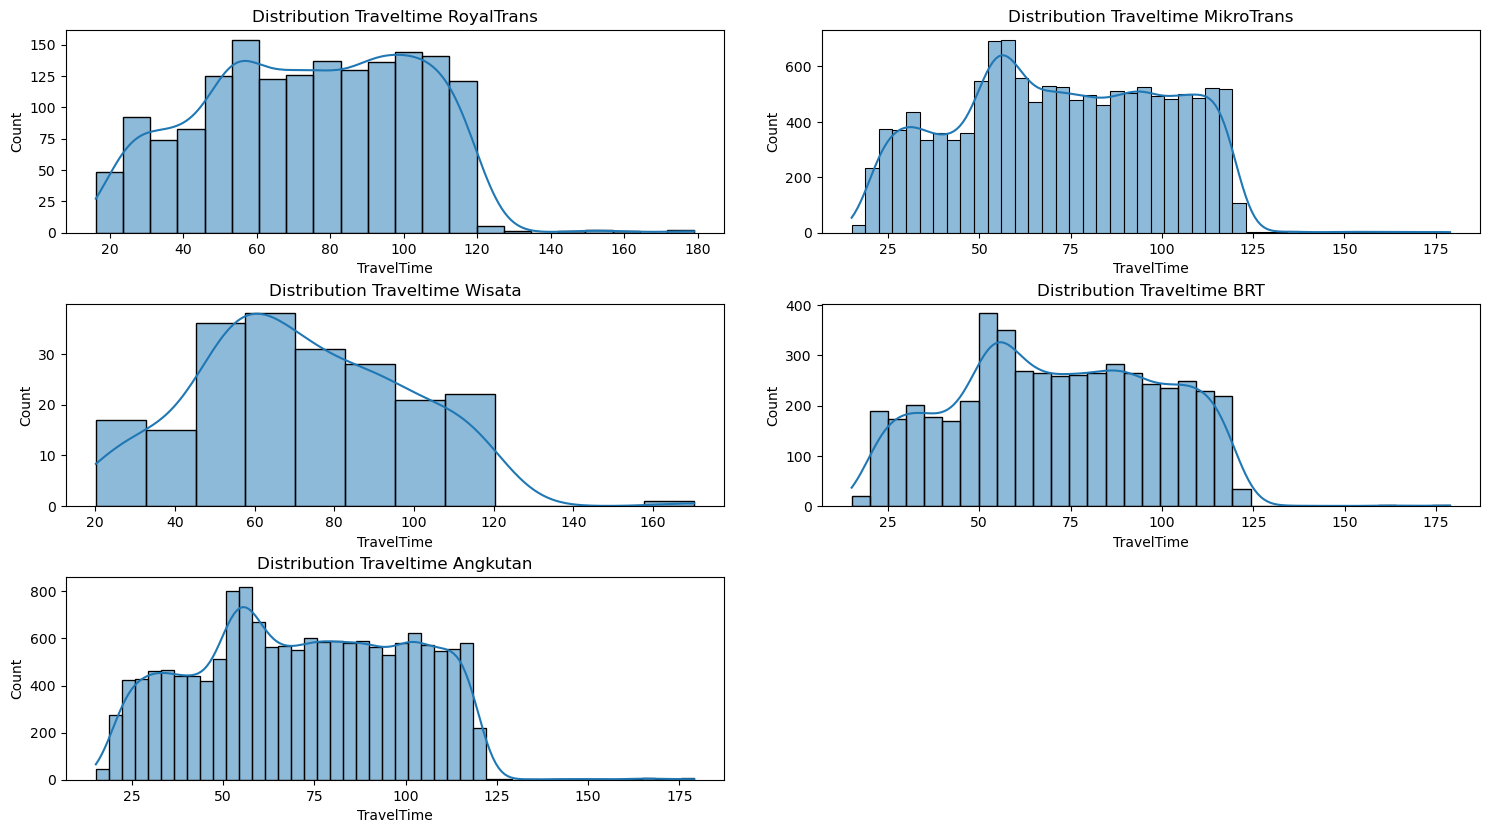

In [56]:

plt.figure(figsize=(15,8))
plt.subplot(3,2,1) # n baris, n kolom, posisition 1
sns.histplot(data=df_royal,x='TravelTime', kde = True)
plt.title('Distribution Traveltime RoyalTrans')

plt.subplot(3,2,2) # n baris, n kolom, posisition 2
sns.histplot(data=df_Mikrotrans,x='TravelTime',kde =True)
plt.title('Distribution Traveltime MikroTrans')
plt.tight_layout(h_pad = 2.0,w_pad= 3.0)

plt.subplot(3,2,3) # n baris, n kolom, posisition 3
sns.histplot(data=df_Wisata,x='TravelTime',kde =True)
plt.title('Distribution Traveltime Wisata')


plt.subplot(3,2,4) # n baris, n kolom, posisition 3
sns.histplot(data=df_BRT,x='TravelTime',kde =True)
plt.title('Distribution Traveltime BRT')


plt.subplot(3,2,5) # n baris, n kolom, posisition 3
sns.histplot(data=df_angkutan,x='TravelTime',kde =True)
plt.title('Distribution Traveltime Angkutan')




Insight:
1. RoyalTrans, Distribusi cenderung normal dengan puncak antara 70–100 menit.Terdapat ekor kanan (right skew), artinya ada perjalanan yang cukup lama (outlier).
2. MikroTrans, Distribusi left skewed (lebih banyak di waktu tempuh tinggi).Puncak waktu perjalanan sekitar 50–80 menit, dengan beberapa mencapai lebih dari 150 menit.
3. Wisata, Distribusi  agak normal, dengan mayoritas perjalanan berkisar 50–90 menit. Ada outlier di atas 150 menit.
4. BRT, Puncak waktu perjalanan sekitar 60–80 menit, distribusi lumayan merata.
5. Angkutan, Distribusi padat dan simetris antara 50–90 menit, dengan banyak data.


In [57]:
q3_royal = df_royal['TravelTime'].quantile(0.75)
q1_royal = df_royal['TravelTime'].quantile(0.25)
IQR_royal = q3_royal-q1_royal
up_royal= q3_royal+(1.5*IQR_royal)

q3_mikro = df_Mikrotrans['TravelTime'].quantile(0.75)
q1_mikro = df_Mikrotrans['TravelTime'].quantile(0.25)
IQR_mikro= q3_mikro-q1_mikro
up_mikro= q3_mikro+(1.5*IQR_mikro)

q3_wisata = df_Wisata['TravelTime'].quantile(0.75)
q1_wisata = df_Wisata['TravelTime'].quantile(0.25)
IQR_wisata= q3_wisata-q1_wisata
up_wisata= q3_wisata+(1.5*IQR_wisata)

q3_brt= df_BRT['TravelTime'].quantile(0.75)
q1_brt = df_BRT['TravelTime'].quantile(0.25)
IQR_brt= q3_brt-q1_brt
up_brt= q3_brt+(1.5*IQR_brt)

q3_angkut = df_angkutan['TravelTime'].quantile(0.75)
q1_angkut = df_angkutan['TravelTime'].quantile(0.25)
IQR_angkut= q3_angkut-q1_angkut
up_angkut= q3_angkut+(1.5*IQR_angkut)

all_up = f'upperbound royaltrans sebesar {up_royal}, upperbound mikrotrans {up_mikro}, upperbound wisata {up_wisata}, upperbound brt {up_brt}, upperbound angkutan {up_angkut}'
all_up


'upperbound royaltrans sebesar 165.57500000000002, upperbound mikrotrans 163.27291666666667, upperbound wisata 146.20000000000002, upperbound brt 158.44791666666663, upperbound angkutan 163.2'

### Mencari korelasi travel time dengan variable lain

Apa penyebab utama waktu perjalanan menjadi sangat lama?

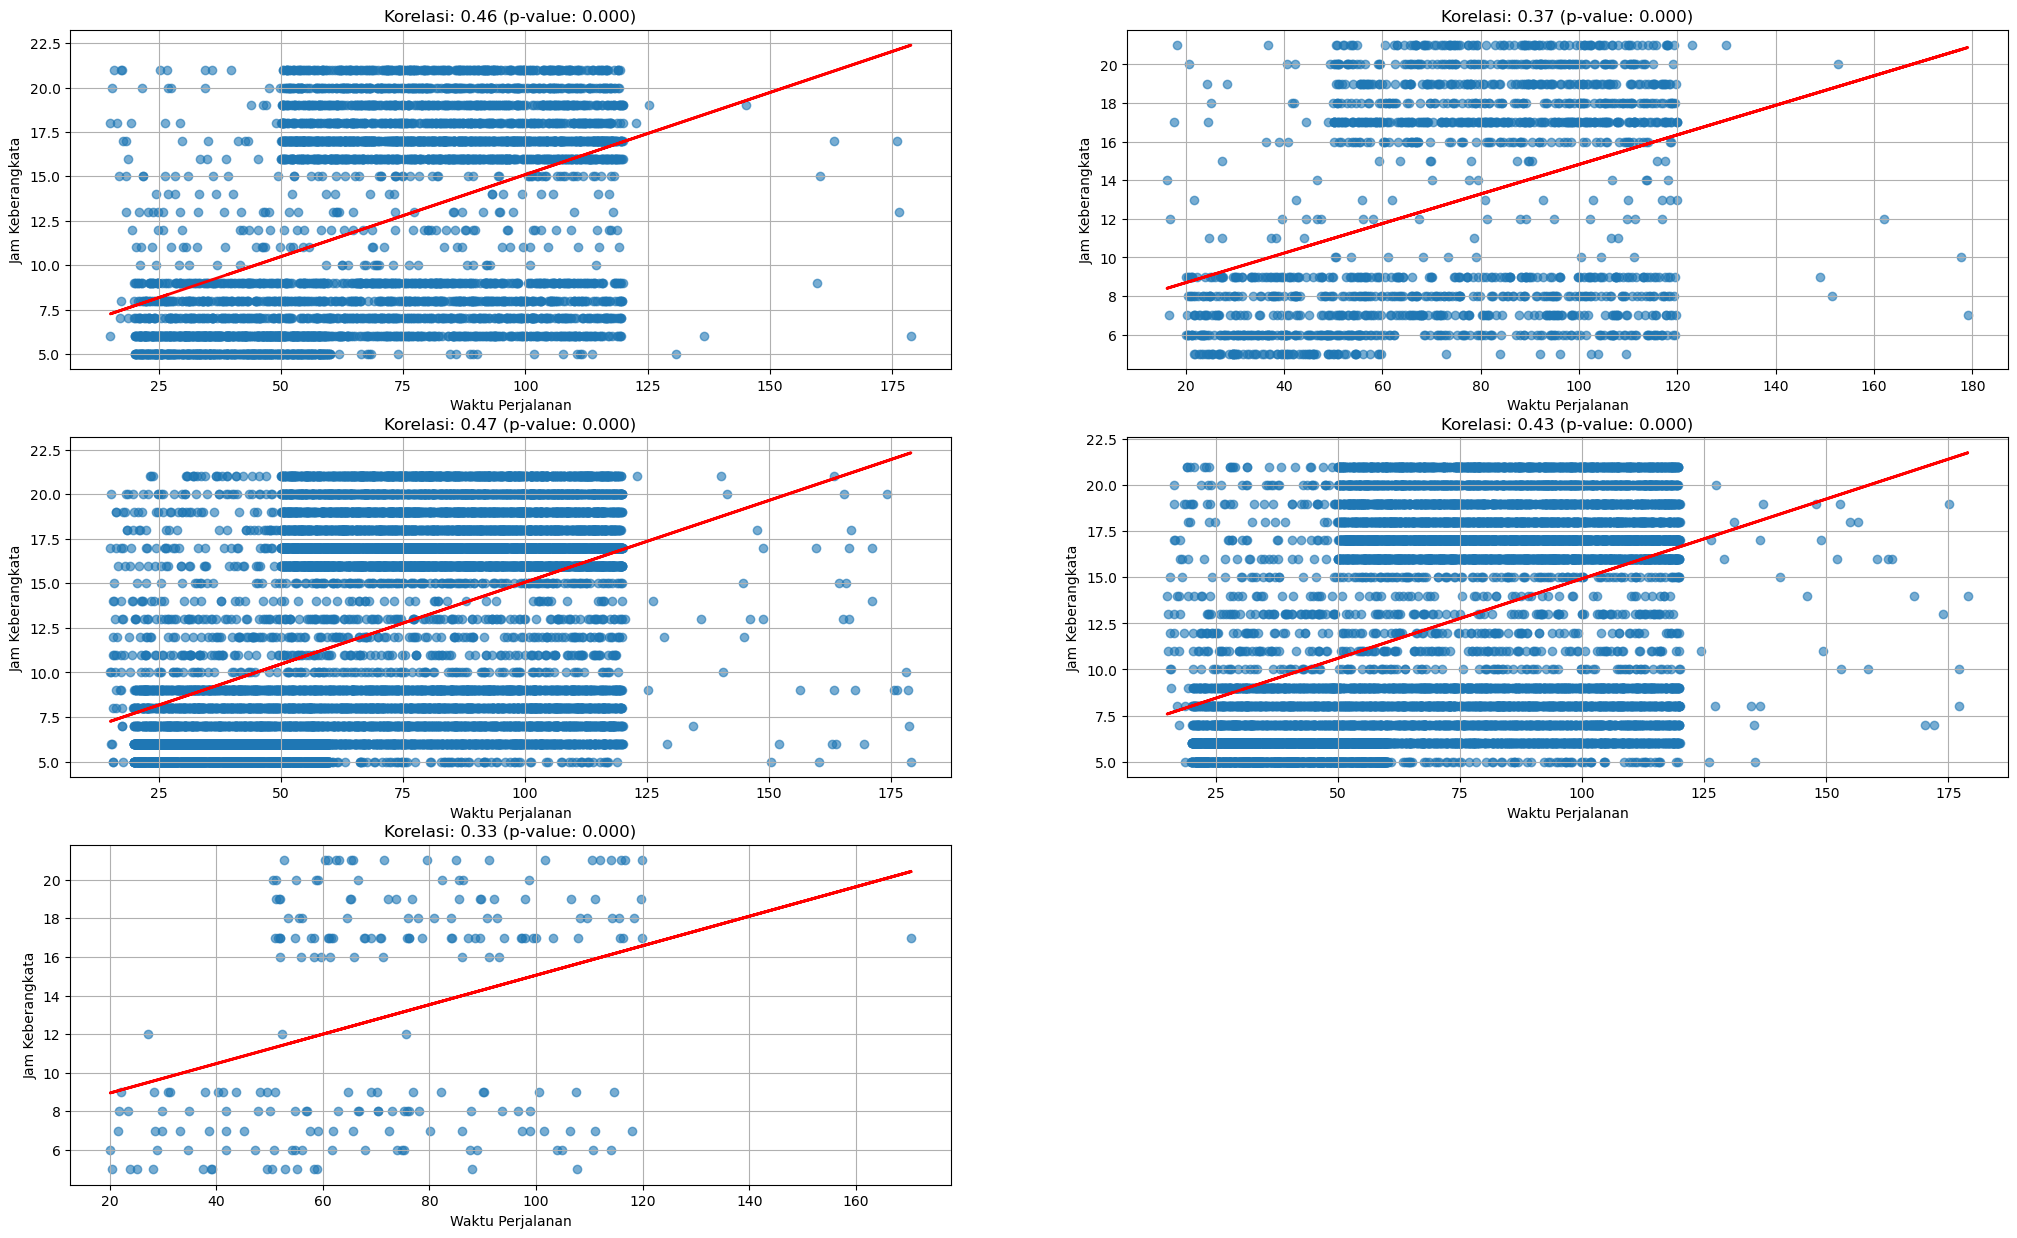

In [58]:

from scipy import stats
corr_coef, p_value = stats.spearmanr(df_BRT['TravelTime'],
    df_BRT['hour']
)
plt.figure(figsize=(25,15))
plt.subplot(3,2,1)
plt.scatter(
    x=df_BRT['TravelTime'],
    y=df_BRT['hour'],
    alpha=0.6
)
plt.title(f'Korelasi: {corr_coef:.2f} (p-value: {p_value:.3f})')
plt.xlabel('Waktu Perjalanan')
plt.ylabel('Jam Keberangkata')
plt.grid(True)

z = np.polyfit(df_BRT['TravelTime'], df_BRT['hour'], 1)
p = np.poly1d(z)
plt.plot(
    df_BRT['TravelTime'], 
    p(df_BRT['TravelTime']), 
    color='red',
    linewidth=2
)
corr_coef, p_value = stats.spearmanr(df_royal['TravelTime'],
    df_royal['hour']
)
plt.subplot(3,2,2)
plt.scatter(
    x=df_royal['TravelTime'],
    y=df_royal['hour'],
    alpha=0.6
)
plt.title(f'Korelasi: {corr_coef:.2f} (p-value: {p_value:.3f})')
plt.xlabel('Waktu Perjalanan')
plt.ylabel('Jam Keberangkata')
plt.grid(True)

z = np.polyfit(df_royal['TravelTime'], df_royal['hour'], 1)
p = np.poly1d(z)
plt.plot(
    df_royal['TravelTime'], 
    p(df_royal['TravelTime']), 
    color='red',
    linewidth=2
)
corr_coef, p_value = stats.spearmanr(df_angkutan['TravelTime'],
    df_angkutan['hour']
)
plt.subplot(3,2,3)
plt.scatter(
    x=df_angkutan['TravelTime'],
    y=df_angkutan['hour'],
    alpha=0.6
)
plt.title(f'Korelasi: {corr_coef:.2f} (p-value: {p_value:.3f})')
plt.xlabel('Waktu Perjalanan')
plt.ylabel('Jam Keberangkata')
plt.grid(True)

z = np.polyfit(df_angkutan['TravelTime'], df_angkutan['hour'], 1)
p = np.poly1d(z)
plt.plot(
    df_angkutan['TravelTime'], 
    p(df_angkutan['TravelTime']), 
    color='red',
    linewidth=2
    )


corr_coef, p_value = stats.spearmanr(df_Mikrotrans['TravelTime'],
    df_Mikrotrans['hour']
)
plt.subplot(3,2,4)
plt.scatter(
    x=df_Mikrotrans['TravelTime'],
    y=df_Mikrotrans['hour'],
    alpha=0.6
)
plt.title(f'Korelasi: {corr_coef:.2f} (p-value: {p_value:.3f})')
plt.xlabel('Waktu Perjalanan')
plt.ylabel('Jam Keberangkata')
plt.grid(True)

z = np.polyfit(df_Mikrotrans['TravelTime'], df_Mikrotrans['hour'], 1)
p = np.poly1d(z)
plt.plot(
    df_Mikrotrans['TravelTime'], 
    p(df_Mikrotrans['TravelTime']), 
    color='red',
    linewidth=2
    )

corr_coef, p_value = stats.spearmanr(df_Wisata['TravelTime'],
    df_Wisata['hour']
)
plt.subplot(3,2,5)
plt.scatter(
    x=df_Wisata['TravelTime'],
    y=df_Wisata['hour'],
    alpha=0.6
)
plt.title(f'Korelasi: {corr_coef:.2f} (p-value: {p_value:.3f})')
plt.xlabel('Waktu Perjalanan')
plt.ylabel('Jam Keberangkata')
plt.grid(True)

z = np.polyfit(df_Wisata['TravelTime'], df_Wisata['hour'], 1)
p = np.poly1d(z)
plt.plot(
    df_Wisata['TravelTime'], 
    p(df_Wisata['TravelTime']), 
    color='red',
    linewidth=2
    )

Insight Umum: Korelasi Waktu Perjalanan vs Jam Keberangkatan
Hampir semua subplot menunjukkan garis regresi merah yang naik ke kanan → ini mengindikasikan bahwa semakin siang waktu keberangkatan, semakin panjang waktu perjalanan.

Korelasi positif terlihat dari nilai korelasi Spearman (sekitar 0.33 – 0.47) di setiap plot. Ini termasuk kategori korelasi lemah hingga sedang, tetapi signifikan karena p-value = 0.000.


In [59]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Hitung rata-rata TravelTime per lokasi tapIn
df_avg = df.groupby(['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon'])['TravelTime'].mean().reset_index()

# Inisialisasi map
indo_map = folium.Map(location=[-4.110702471576238, 122.44288788870597], zoom_start=4)

# Marker cluster
marker_cluster = MarkerCluster().add_to(indo_map)

# Warna berdasarkan kuartil
max_time = df_avg['TravelTime'].max()
q1 = df_avg['TravelTime'].quantile(0.33)
q2 = df_avg['TravelTime'].quantile(0.66)

for index, row in df_avg.iterrows():
    # Menentukan warna berdasarkan kuartil
    if row['TravelTime'] > q2:
        color = 'red'
    elif q1 < row['TravelTime'] <= q2:
        color = 'orange'
    else:
        color = 'green'
    
    # Membuat popup dengan informasi lengkap
    popup_text = f"""
    <b>Lokasi:</b> {row['tapInStopsName']}<br>
    <b>Rata-rata Waktu Perjalanan:</b> {row['TravelTime']:.2f} menit
    """
    
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        icon=folium.Icon(color=color, icon='info-sign'),
        popup=folium.Popup(popup_text, max_width=250),
        tooltip=f"Rata-rata: {row['TravelTime']:.2f} menit"
    ).add_to(marker_cluster)



indo_map

insight:  Berdasarkan rata rata waktu perjalanan yang dibagi menjadi 3 kategori warna
dilihat dari lokasi TapIN
- Titik oranye kemerahan menunjukkan waktu perjalanan yang tinggi (kelompok kuartil atas).Titik orange banyak terpusat di Jakarta
- Titik warna kuning hingga hijau menunjukan waktu perjalanan yang lebih singkat. 
- Titik kuning terpusat di (Tangerang selatan, tanggerang, dan bekasi), sedangkan titik hijau terpusat di tangerang

### Analisis Frequency

In [60]:
df_customer = df.groupby('payCardID').agg(
frequency=('transID', lambda x: x.nunique()),    
).reset_index()

df_customer.to_csv('RFM.CSV')

In [61]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   payCardID  1976 non-null   int64
 1   frequency  1976 non-null   int64
dtypes: int64(2)
memory usage: 31.0 KB


In [62]:
display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

0.00     1.0
0.25     4.0
0.50    11.5
0.75    37.0
1.00    40.0
Name: frequency, dtype: float64

In [63]:
df_customer['f_score'] = pd.qcut(
    df_customer['frequency'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk length: semakin lama, maka semakin besar skornya
).astype(int)

df_customer

payCardID  frequency  f_score
0             60403675436         38        4
1             60404498697         37        3
2             60417020934          4        1
3             60421208343          4        1
4             60427539402          1        1
...                   ...        ...      ...
1971  4980316891349967240          3        1
1972  4980564692107508708         13        3
1973  4986663118222525457         38        4
1974  4995586292967989635          4        1
1975  4997693930906134609         39        4

[1976 rows x 3 columns]

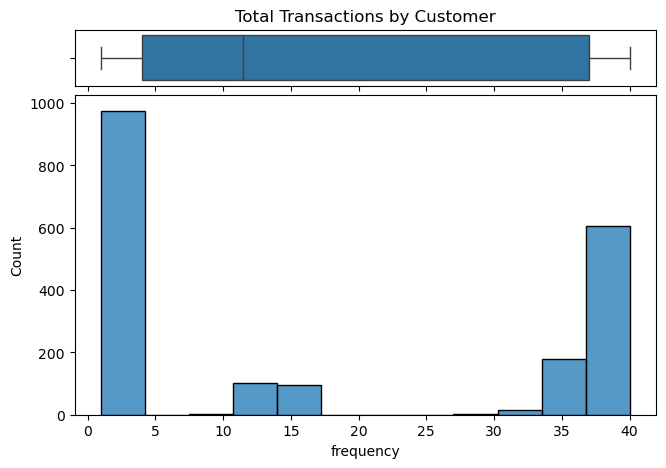

0.00     1.0
0.25     4.0
0.50    11.5
0.75    37.0
1.00    40.0
Name: frequency, dtype: float64

In [64]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='frequency', ax=ax_top)
sns.histplot(data=df_customer, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

insight: Penumpang tranjakarta bila dilihat hanya dengan data satu bulan pada april 2023
Mayoritas penumpang hanya menggunakan Transjakarta antara 1-4 kali dapat diasumsikan penumpang dalam segmen ini tidak menggunakan tranjakarta sebagai transportasi utama berpergian. Namun ada cukup banyak penumpang yang menggunakan Tranjakarta antara 37-40 kali selama sebulan atau hampir setiap hari menggunakan transjakarta, dapat diasuksikan penumpang dalam segmen ini menggunakan tranjakarta sebagai tranportasi utama berpergian.

Dari bloxplot terlihat bahwa median ketarik kekiri yang artinya banyak frekuensi kecil dalam data.

In [65]:
def nilai_f(x):
    if x == 1:
        return 'Dormant User' 
    elif x == 2:
        return 'Reguler user'
    elif x == 3:
        return 'Potential Loyalist'
    else:
        return 'Loyal User'
    
df_customer['kat_fscore'] = df_customer['f_score'].apply(nilai_f)
df_customer

df_customer.to_csv('lrfm_bener.CSV')

In [66]:
df_customer

payCardID  frequency  f_score          kat_fscore
0             60403675436         38        4          Loyal User
1             60404498697         37        3  Potential Loyalist
2             60417020934          4        1        Dormant User
3             60421208343          4        1        Dormant User
4             60427539402          1        1        Dormant User
...                   ...        ...      ...                 ...
1971  4980316891349967240          3        1        Dormant User
1972  4980564692107508708         13        3  Potential Loyalist
1973  4986663118222525457         38        4          Loyal User
1974  4995586292967989635          4        1        Dormant User
1975  4997693930906134609         39        4          Loyal User

[1976 rows x 4 columns]

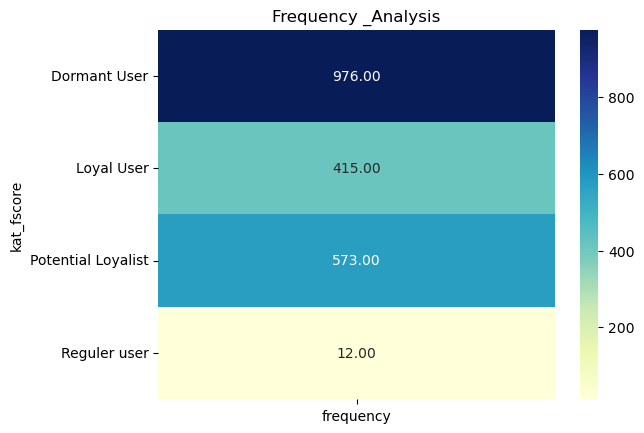

In [67]:
lrfm_heatmap = df_customer.pivot_table(index='kat_fscore', values='frequency', aggfunc='count')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Frequency _Analysis')
plt.show()

Pengecekan jumlah lansia naik dan turun terbanyak di halte BRT

In [68]:
#Pengecekan jumlah lansia terbanyak di halte BRT naik dari mana saja
df_lansia= df_BRT[df_BRT['Age_Type']== 'Lansia']
df_lansia.groupby(by = ['Age_Type', 'tapInStopsName'])[['transID']].count().sort_values('transID', ascending= False).head(1)

transID
Age_Type tapInStopsName         
Lansia   Masjid Agung         20

In [69]:
# Pengecekan jumlah lansia terbanyak di halte BRT turun di mana saja
df_lansia= df_BRT[df_BRT['Age_Type']== 'Lansia']
df_lansia.groupby(by = ['Age_Type', 'tapOutStopsName'])[['transID']].count().sort_values('transID', ascending= False).head(1)

transID
Age_Type tapOutStopsName         
Lansia   Masjid Agung          20

Pengecekan koridor setiap layanan dengan jumlah perempuan terbanyak

In [70]:
df_perempuan = df_BRT[df_BRT['payCardSex']== 'F']
df_perempuan.groupby(by = ['payCardSex', 'corridorID'])[['transID']].count().sort_values('transID', ascending= False).head(1)

transID
payCardSex corridorID         
F          13              160

In [71]:
df_perempuan = df_royal[df_royal['payCardSex']== 'F']
df_perempuan.groupby(by = ['payCardSex', 'corridorID'])[['transID']].count().sort_values('transID', ascending= False).head(1)

transID
payCardSex corridorID         
F          B14             175

In [72]:
df_perempuan = df_Mikrotrans[df_Mikrotrans['payCardSex']== 'F']
df_perempuan.groupby(by = ['payCardSex', 'corridorID'])[['transID']].count().sort_values('transID', ascending= False).head(1)

transID
payCardSex corridorID         
F          JAK.112         196

In [73]:
df_perempuan = df_Wisata[df_Wisata['payCardSex']== 'F']
df_perempuan.groupby(by = ['payCardSex', 'corridorID'])[['transID']].count().sort_values('transID', ascending= False).head(1)

transID
payCardSex corridorID         
F          BW9             155

In [74]:
df_perempuan = df_angkutan[df_angkutan['payCardSex']== 'F']
df_perempuan.groupby(by = ['payCardSex', 'corridorID'])[['transID']].count().sort_values('transID', ascending= False).head(1)

transID
payCardSex corridorID         
F          9D              220

**Rekomendasi**
1. Permasalahan keterbatasan armada dapat diatasi dengan menambahkan armada baru. Jika diasumsikan satu layanan hanya mendapatkan 1 armada baru koridor S21 (angkut), 1T (Royaltrans), BW9(Wisata), 2(BRT) lah yang layak mendapatkan armada karena pertimbangan jumlah penumpang yang menggunakan koridor tersebut

2. Kasus pelecehan cukup sering terjadi saat menggunakan transjakarta. Oleh karena itu, dibuatlah bus pink(bus khusus wanita). Bus ini hanya melewati 4 koridor, Koridor 3,13,2 dan 9. Namun, jumlah perempuan pada koridor 9 cukup sedikit sehingga adanya bus wanita dirasa kurang diperlukan. Jika bus koridor 9 diganti mungkin bisa menambahkan unit bus wanita pada koridor lain seperti koridor 13(BRT, sudah ada dalam list),B14(Royaltrans),JAK 112(Mikrotrans), BW9(wisata) dan 9D(Angkut) yang memiliki jumlah penumpang perempuan terbanyak setiap layananya.

3. Antrian panjang saat melakukan tapin dan tapout dapat disebabkan karena kurangnya gate akses kartu. Hal ini dapat diatasi dengan menambahkan gate, bila diasumsikan dapat membuat gate baru (hanya pada BRT) halte yang dipilih adalah halte taman mini untuk lokasi tapin dan halte BKN untuk lokasi tapout. 

- Bila igin melihat tren lokasi pemberhentian teramai setiap layanan bisa liat dilokasi penjaringam (angkut), ST MRT FAtmawati (royal trans), Kampung rambutan mikrotrans(mikrotrans),Pantai maju (wisata), bKN (BRT). Bila igin melihat tren lokasi mulai perjalanan teramai setiap layanan bisa liat dilokasi penjaringam (angkut), GBK1 (royal trans), RSUD Pesanggrahan (mikrotrans), IRTI Monas (wisata), garuda taman mini (BRT). 

4. Untuk meningkatkan aksesibilitas lansia di transjakarta, rekomendasi yang dapat diberikan dapat berupa pembuatan lift atau jalan landai yang dapat dilalui kursi roda. Jika diasumsikan dapat menambahkan fasilitas tersebut pada satu halte (BRT) pada masing masing layanan maka halte yang mendapatkan tambahan fasilitas tersebut adalah masjid agung.

5. Waktu perjalanan menjadi lebih lama ketika jam sibuk dapat dibuktikan benar. Menurut uji korelasi dan grafik scater menunjukan hal demikian. Hal ini dapat disebabkan karena padatnya armada pada jam-jam tersebut atau jalanan yang ramai sehingga waktu perjalanan menjadi semakin lama. Untuk menangani masalah tersebut dapat menambahkan unit transjakarta dan menghimbau masyarakat untuk memakai transportasi umum

6. Beberapa penumpang yang tidak menaiki layanan mikrotrans dan bus wisata memiliki payamount = 0, mengapa demikian? 
Hal ini dapat terjadi karena penumpang menggunakan paycard DKI. Terdapat aturan yang menjelaskan bahwa ada beberapa kriteria penumpang yang menggunakan paycard DKI tidak dikenakan biaya layanan. Dalam data terdapat 1400 penumpang yang memakai Paycard DKI dengan payamoun 0 walaupun bukan termasuk layanan mikrotrans dan wisata. Namun terdapat penumpang menggunakan paycard lain mendapatkan payamount 0 yang tidak seharusnya. Hal ini dapat terjadi karena beberapa kondisi tertentu yang belum dianalisis lebih lanjut.

